# Micro-Credit Defaulter Project

## Table of Content

* [1. Introduction](#1)
* [2. Data Reading and Information](#2)
* [3. Preprocessing and EDA](#3)
* [4. Data Visualization](#4)
* [5. Preprocessing Pipeline](#5)
* [6. Building Machine Learning Model](#6)
* [7. Concluding Remarks](#7)

# 1. Introduction

**STATEMENT: A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.**

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
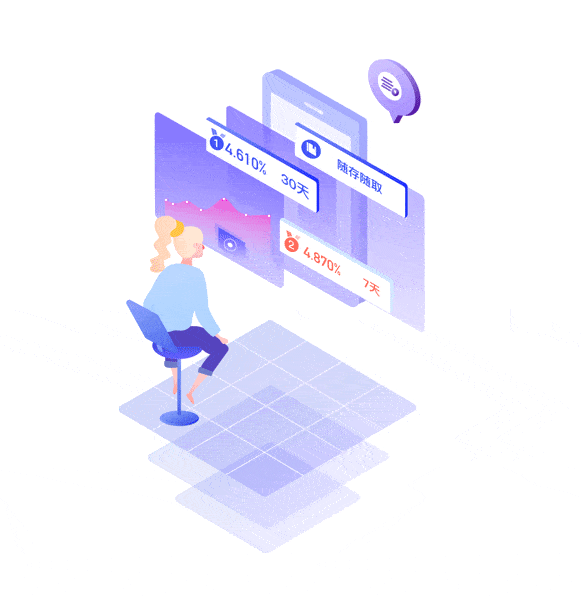

**Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients**.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

**NOTE: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.


# 2. Data Reading and Information

In [1]:
#Imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Data file.csv")
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                31

We can observe that label is the target column, where I have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.So clearly it's a **Classification problem**.

# Features information:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

# 3.Preprocessing and EDA


In [3]:
df.shape

(209593, 37)

Observation:

    There are 209593 rows and 37 columns present in the dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Features:
    
    Variable : Defination -> comment
    
    label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    msisdn : mobile number of user
    aon : age on cellular network in days
    daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    rental30 : Average main account balance over last 30 days -> Unsure of given definition
    rental90 : Average main account balance over last 90 days -> Unsure of given definition
    last_rech_date_ma : Number of days till last recharge of main account
    last_rech_date_da : Number of days till last recharge of data account
    last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    fr_ma_rech30 : Frequency of main account recharged in last 30 days -> Unsure of given definition
    sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    fr_ma_rech90 : Frequency of main account recharged in last 90 days -> Unsure of given definition
    sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    cnt_da_rech30 : Number of times data account got recharged in last 30 days
    fr_da_rech30 : Frequency of data account recharged in last 30 days
    cnt_da_rech90 : Number of times data account got recharged in last 90 days
    fr_da_rech90 : Frequency of data account recharged in last 90 days
    cnt_loans30 : Number of loans taken by user in last 30 days
    amnt_loans30 : Total amount of loans taken by user in last 30 days
    maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days -> There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
    medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
    cnt_loans90 : Number of loans taken by user in last 90 days
    amnt_loans90 : Total amount of loans taken by user in last 90 days
    maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
    medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
    payback30 : Average payback time in days over last 30 days
    payback90 : Average payback time in days over last 90 days
    pcircle : telecom circle
    pdate : date


In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Observation:
    
    1. There are two types of data present in the dataset categorical and numerical.
    
    2. msisdn, pcircle, pdate are in categorical data type rest other columns are in numerical data types.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

## Checking missing values

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Observation:
    
    There are no missing values present in the dataset. We can also confirm this via visualization with the help of heatmap.

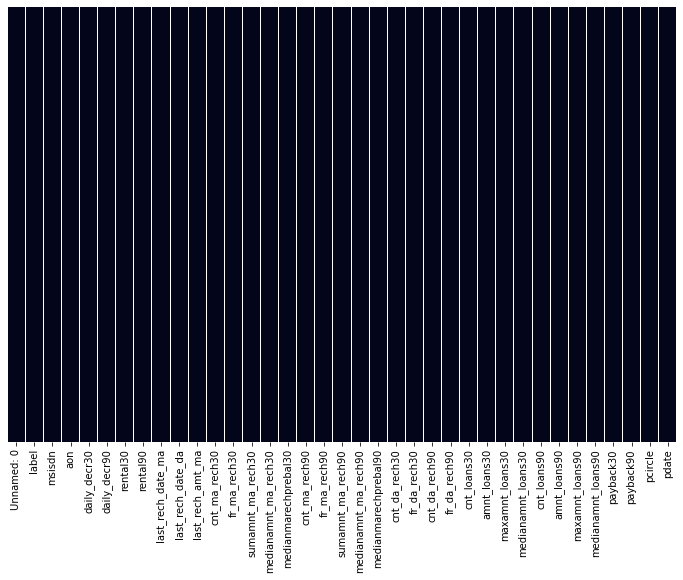

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

observation:
    
    We confirm that there are no missing values present in the dataset through heatmap.

## Exploring categorical columns

In [10]:
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
55809I89238    6
67324I84453    6
42825I88688    6
              ..
82978I85339    1
59613I89239    1
69665I70786    1
28602I95203    1
27596I91190    1
Name: msisdn, Length: 186243, dtype: int64
*******************************************************************************************************


pcircle : ['UPW']
UPW    209593
Name: pcircle, dtype: int64
*******************************************************************************************************


pdate : ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-0

Observation:

1. In the column msisdn the mobile number of users are recurring so to do it's analysis and check the correlation we will have to convert it to float data type.


2. In the column pcircle there is only one unique value 'UPW' is present so we will be dropping this column.

In [11]:
from collections import Counter
Counter(df['pdate'])

Counter({'2016-07-20': 2842,
         '2016-08-10': 2178,
         '2016-08-19': 1132,
         '2016-06-06': 2631,
         '2016-06-22': 2906,
         '2016-07-02': 2910,
         '2016-07-05': 3127,
         '2016-08-05': 2298,
         '2016-06-15': 3033,
         '2016-06-08': 2580,
         '2016-06-12': 2936,
         '2016-06-20': 3099,
         '2016-06-29': 2832,
         '2016-06-16': 2824,
         '2016-08-03': 2213,
         '2016-06-24': 2785,
         '2016-07-04': 3150,
         '2016-07-03': 2905,
         '2016-07-01': 2954,
         '2016-08-08': 2428,
         '2016-06-26': 2901,
         '2016-06-23': 2964,
         '2016-07-06': 3041,
         '2016-07-09': 2922,
         '2016-06-10': 2858,
         '2016-06-07': 2502,
         '2016-06-27': 2999,
         '2016-08-11': 2157,
         '2016-06-30': 2822,
         '2016-06-19': 2833,
         '2016-07-26': 2273,
         '2016-08-14': 1951,
         '2016-06-14': 2945,
         '2016-06-21': 2890,
         '2016

Observation:
    
    1. From the pdate column we will be extracting day and month to seperate columns.
    
    2. As there is only one unique year value '2016' present we will be ignoring it.

## Feature extraction

In [12]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['pdate']

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

In [13]:
df['pdate'].dt.day

0         20
1         10
2         19
3          6
4         22
          ..
209588    17
209589    12
209590    29
209591    25
209592     7
Name: pdate, Length: 209593, dtype: int64

In [14]:
df['day'] = df['pdate'].dt.day

In [15]:
df['pdate'].dt.month

0         7
1         8
2         8
3         6
4         6
         ..
209588    6
209589    6
209590    7
209591    7
209592    7
Name: pdate, Length: 209593, dtype: int64

In [16]:
df['month'] = df['pdate'].dt.month

In [17]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle      pdate  day  month  
0                 0.0  29.000000  29.000000     UPW 2016-07-20   20      7  
1                 0.0   0.000000   0.000000     UPW 2016-08-10   10      8  
2                 0.0   0.000000   0.000000     UPW 2016-08-19   19      8  
3                 0.0   0.000000   0.000000     UPW 2016-06-06    6      6  
4                 0.0   2.333333   2.333333     UPW 2016-06-22   22      6

We have extracted day and month from the pdate column.

## Encoding categorical column

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'].astype(str))

In [19]:
df.head()

Unnamed: 0  label  msisdn    aon  daily_decr30  daily_decr90  rental30  \
0           1      0   40191  272.0   3055.050000   3065.150000    220.13   
1           2      1  142291  712.0  12122.000000  12124.750000   3691.26   
2           3      1   33594  535.0   1398.000000   1398.000000    900.13   
3           4      1  104157  241.0     21.228000     21.228000    159.42   
4           5      1    6910  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    260.13                2.0                0.0              1539   
1   3691.26               20.0                0.0              5787   
2    900.13                3.0                0.0              1539   
3    159.42               41.0                0.0               947   
4   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle      pdate  day  month  
0                 0.0  29.000000  29.000000     UPW 2016-07-20   20      7  
1                 0.0   0.000000   0.000000     UPW 2016-08-10   10      8  
2                 0.0   0.000000   0.000000     UPW 2016-08-19   19      8  
3                 0.0   0.000000   0.000000     UPW 2016-06-06    6      6  
4                 0.0   2.333333   2.333333     UPW 2016-06-22   22      6

## Summary statistics

In [20]:
df.describe()

Unnamed: 0          label         msisdn            aon  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177   93100.650179    8112.343445   
std     60504.431823       0.330519   53758.461427   75696.082531   
min         1.000000       0.000000       0.000000     -48.000000   
25%     52399.000000       1.000000   46506.000000     246.000000   
50%    104797.000000       1.000000   93073.000000     527.000000   
75%    157195.000000       1.000000  139626.000000     982.000000   
max    209593.000000       1.000000  186242.000000  999860.755168   

        daily_decr30   daily_decr90       rental30       rental90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     5381.402289    6082.515068    2692.581910    3483.406534   
std      9220.623400   10918.812767    4308.586781    5770.461279   
min       -93.012667     -93.012667  -23737.140000  -24720.580000   
25%        42.440000      42.692000     280.420000     300.260000   
50%      1469.175667    1500.000000    1083.570000    1334.000000   
75%      7244.000000    7802.790000    3356.940000    4201.790000   
max    265926.000000  320630.000000  198926.110000  200148.110000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
count      209593.000000      209593.000000     209593.000000  209593.000000   
mean         3755.847800        3712.202921       2064.452797       3.978057   
std         53905.892230       53374.833430       2370.786034       4.256090   
min           -29.000000         -29.000000          0.000000       0.000000   
25%             1.000000           0.000000        770.000000       1.000000   
50%             3.000000           0.000000       1539.000000       3.000000   
75%             7.000000           0.000000       2309.000000       5.000000   
max        998650.377733      999171.809410      55000.000000     203.000000   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
count  209593.000000      209593.000000         209593.000000   
mean     3737.355121        7704.501157           1812.817952   
std     53643.625172       10139.621714           2070.864620   
min         0.000000           0.000000              0.000000   
25%         0.000000        1540.000000            770.000000   
50%         2.000000        4628.000000           1539.000000   
75%         6.000000       10010.000000           1924.000000   
max    999606.368132      810096.000000          55000.000000   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  \
count         209593.000000   209593.00000  209593.000000      209593.000000   
mean            3851.927942        6.31543       7.716780       12396.218352   
std            54006.374433        7.19347      12.590251       16857.793882   
min             -200.000000        0.00000       0.000000           0.000000   
25%               11.000000        2.00000       0.000000        2317.000000   
50%               33.900000        4.00000       2.000000        7226.000000   
75%               83.000000        8.00000       8.000000       16000.000000   
max           999479.419319      336.00000      88.000000      953036.000000   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
count         209593.000000         209593.000000  209593.000000   
mean            1864.595821             92.025541     262.578110   
std             2081.680664            369.215658    4183.897978   
min                0.000000           -200.000000       0.000000   
25%              773.000000             14.600000       0.000000   
50%             1539.000000             36.000000       0.000000   
75%             1924.000000             79.310000       0.000000   
max            55000.000000          41456.500000   99914.441420   

        fr_da_rech30  cnt_da_rech90   fr_da_rech90    cnt_loans30  \
count  209593.000000  209593.000000  209593.000000  2095

Observation:
    
    1. Maximum standard deviation is observed in aon column.
    
    2. In the columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, maxamnt_loans30, cnt_loans90, amnt_loans90 mean is considerably greater than median so the columns are positively skewed.
    
    3. In the columns label, month median is greater than mean so the columns are negatively skewed.
    
    4. In the columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, maxamnt_loans30, cnt_loans90, payback30, payback90 there is huge difference present between 75th perecentile and maximum so outliers are present here.
    
    5. Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.

## To check the correlation

In [21]:
df_cor=df.corr()
df_cor

Unnamed: 0     label    msisdn       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403  0.000121 -0.002048      0.002739   
label                   0.000403  1.000000  0.001976 -0.003785      0.168298   
msisdn                  0.000121  0.001976  1.000000  0.000566      0.000717   
aon                    -0.002048 -0.003785  0.000566  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.000717  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000950  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.001404 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000691 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728 -0.000928  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711  0.001400 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804 -0.002368  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331  0.000617 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001804 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.001094  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.000668  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829 -0.000238  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.001859 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385 -0.004413  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793 -0.000936  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855 -0.000625  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000615 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827 -0.001720  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027 -0.000241  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.004595  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418 -0.002233  0.005395      0.020673   
cnt_loans30             0.001725  0.196283  0.001765 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272  0.002170 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.000755 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.000986  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733  0.001859 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.000155 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144  0.003286 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.001210  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.002922  0.001940      0.026915   
payback90               0.002411  0.049183  0.002671  0.002203      0.047175   
day                    -0.002045  0.006825  0.002466  0.000662      0.006477   
month                   0.003205  0.154949 -0.002986 -0.001863      0.518664   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
msisdn                    0.000950 -0.001404 -0.000691          -0.000928   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260   

For better understanding we will see it via visualization with the help of heatmap.

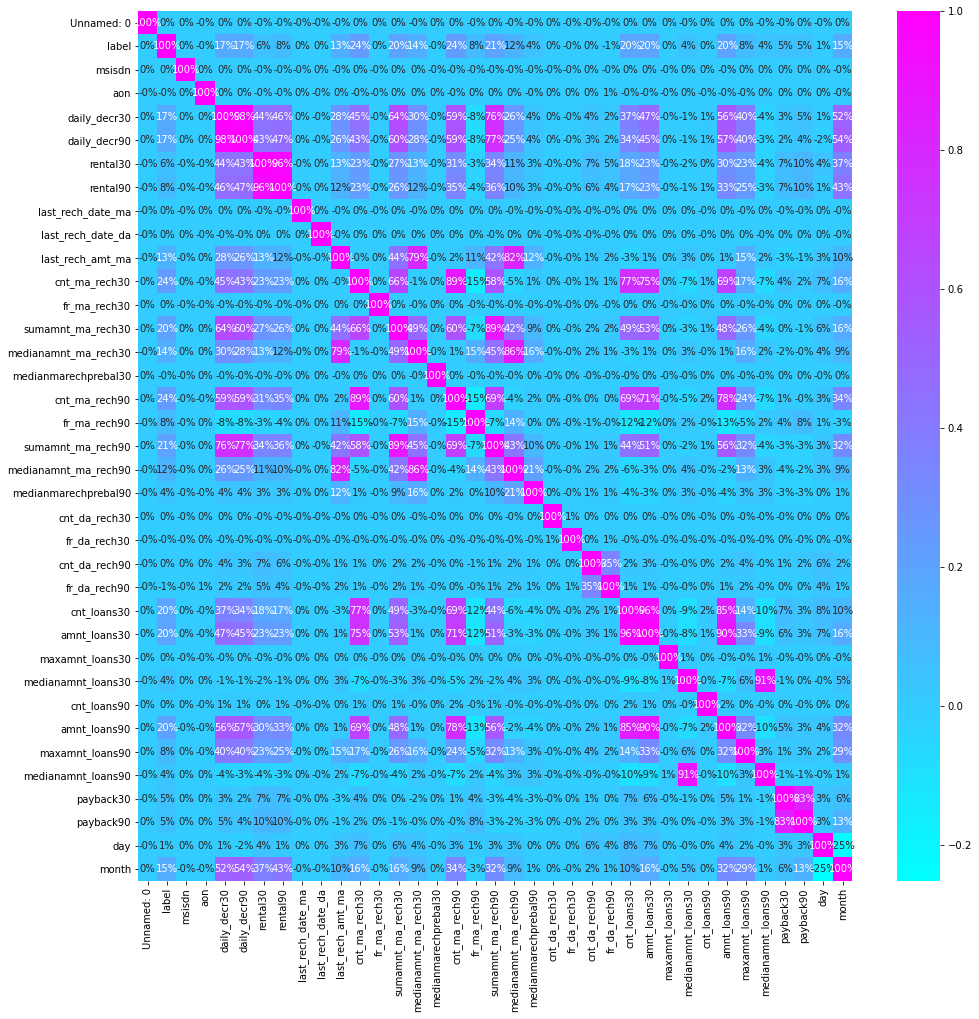

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. The columns amnt_loans90, amnt_loans30, cnt_loans20, sumamnt_ma_rech90, cnt_ma_rech90, cnt_ma_rech30, sumamnt_ma_rech30 are highly positively correlated with label column.
    
    2. We have observed multicollinearity in between columns so we will be using PCA(Principal Component Analysis)
    
    3. No correlation has been observed in Unnamed: 0 ,msisdn, last_rechdate_ma, last_rech_date_da column so will be dropping these columns.

Text(0.5, 1.0, 'correaltion with target variable label')

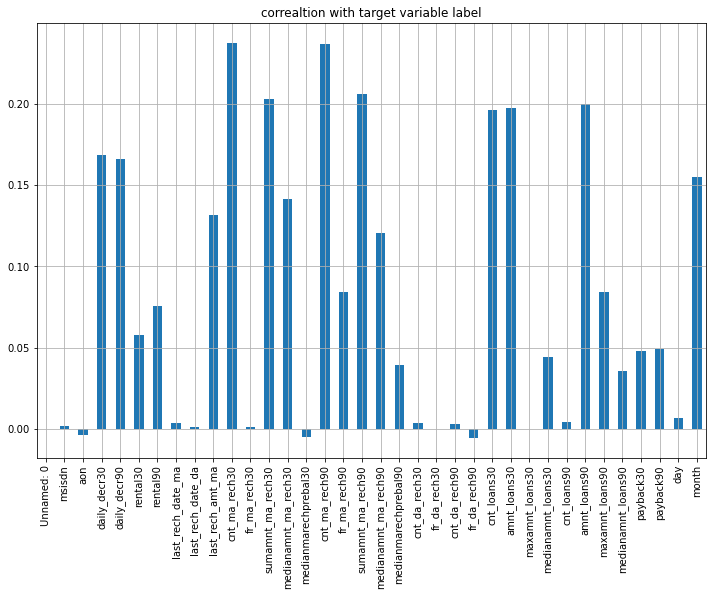

In [23]:
#checking the correlation with target variable 'label'

plt.figure(figsize=(12,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion with target variable label")

Observation:
    
    Target variable label is highly positively correlated with cnt_ma_rech30, cnt_ma_rech90 and negatively correlated with aon, medianmarechprebal30, fr_da_rech_90.

## Dropping unnecessary columns

In [24]:
df.drop(['Unnamed: 0','msisdn','pdate','pcircle','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','fr_da_rech30'],axis=1,inplace=True)

In [25]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              1539              2             3078.0                1539.0   
1              5787              1             5787.0                5787.0   
2              1539              1             1539.0                1539.0   
3               947              0                0.0                   0.0   
4              2309              7            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  cnt_da_rech90  \
0                1539.0                  7.50            0.0              0   
1                5787.0                 61.04            0.0              0   
2                1539.0                 66.32            0.0              0   
3                 947.0                  2.50            0.0              0   
4                2888.0                 35.00            0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12              6.0   
1             0            1            12             12.0   
2             0            1             6              6.0   
3             0            2            12              6.0   
4             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  day  month  
0                 0.0  29.000000  29.000000   20      7  
1                 0.0   0.000000   0.000000   10      8  
2                 0.0   0.000000   0.000000   19      8  
3                 0.0   0.000000   0.000000    6      6  
4                 0.0   2.333333   2.333333   22      6

# 4.Data Visualization

Our target variable is label

1 - Success(Non Defaulter)

0 - Failure(Defaulter)

## Univariate Analysis

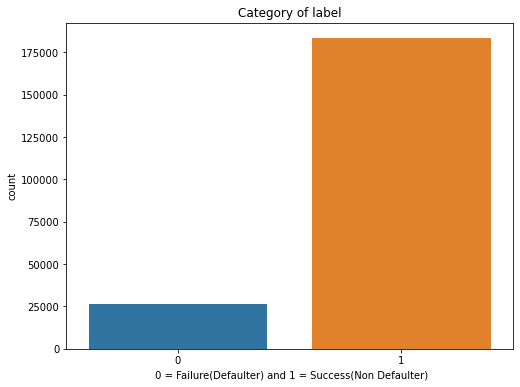

1    183431
0     26162
Name: label, dtype: int64

In [26]:
#Checking the target variable

plt.subplots(figsize=(8,6))
sns.countplot(x="label", data=df)
plt.title("Category of label")
plt.xlabel(' 0 = Failure(Defaulter) and 1 = Success(Non Defaulter)')
plt.ylabel("count")
plt.show()

df['label'].value_counts()

Observation:
    
    1. We observe 183431 number of Non defaulters where as 26162 number of defaulters.
    
    2. We observe that this is a very imbalanced data set.

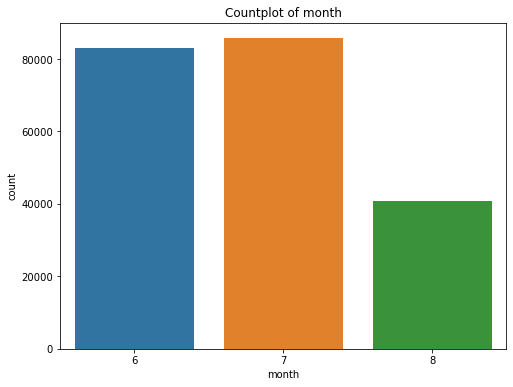

7    85765
6    83154
8    40674
Name: month, dtype: int64

In [27]:
#Checking the month column

plt.subplots(figsize=(8,6))
sns.countplot(x="month", data=df)
plt.title("Countplot of month")
plt.xlabel('month')
plt.ylabel("count")
plt.show()

df['month'].value_counts()

Observation:
    
       Maximum(85765) number of users has taken credit on 7th month.

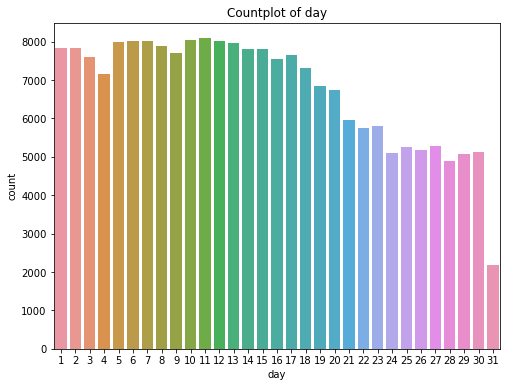

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64

In [28]:
#Checking the day column

plt.subplots(figsize=(8,6))
sns.countplot(x="day", data=df)
plt.title("Countplot of day")
plt.xlabel('day')
plt.ylabel("count")
plt.show()

df['day'].value_counts()

Observation:
    
    Maximum(8092) number of users have taken credit on 11th day of the month. 

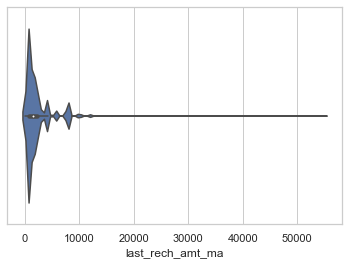

1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
19913        1
10454        1
14783        1
4066         1
22609        1
Name: last_rech_amt_ma, Length: 70, dtype: int64

In [29]:
#Voilinplot of column last_rech_amt_ma


sns.set(style='whitegrid')
sns.violinplot(df['last_rech_amt_ma'])
plt.show()

df['last_rech_amt_ma'].value_counts()

Observation:
    
    Maximum(56297) number of customers last_rech_amt_ma is 1539.

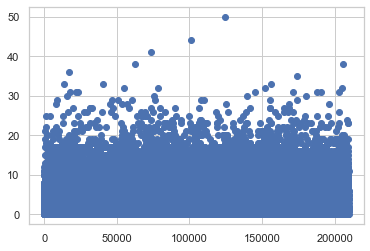

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64

In [30]:
# SCatter plot of cnt_loans30 column

plt.scatter(df.index,df['cnt_loans30'])
plt.show()

df['cnt_loans30'].value_counts()

Observation:
    
    Maximum(83432) number of customers cnt_loans30 is 1.

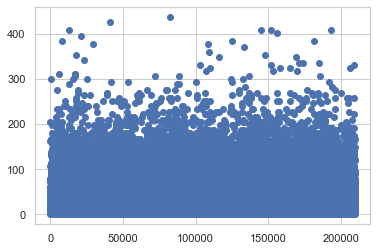

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64

In [31]:
# SCatter plot of amnt_loans90 column

plt.scatter(df.index,df['amnt_loans90'])
plt.show()

df['amnt_loans90'].value_counts()

Observation:
    
    Maximum(69131) number of customers took the amnt_loans90 of 6.

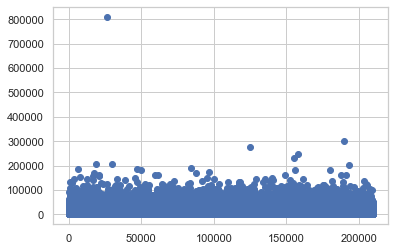

0.0        27979
1539.0      9006
770.0       6040
773.0       4540
2309.0      4509
           ...  
11615.0        1
20837.0        1
15618.0        1
20834.0        1
40563.0        1
Name: sumamnt_ma_rech30, Length: 15141, dtype: int64

In [32]:
# SCatter plot of sumamnt_ma_rech30 column

plt.scatter(df.index,df['sumamnt_ma_rech30'])
plt.show()

df['sumamnt_ma_rech30'].value_counts()

Observation:
    
    Maximum(27979) customers sumamnt_ma_rech30 is 0.

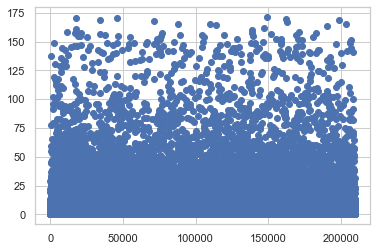

0.000000     106712
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
3.736842          1
80.333333         1
5.222222          1
50.750000         1
60.333333         1
Name: payback30, Length: 1363, dtype: int64

In [33]:
# SCatter plot of payback30 column

plt.scatter(df.index,df['payback30'])
plt.show()

df['payback30'].value_counts()

Observation:
    
    Maximum(106712) customers payback30 is 0.

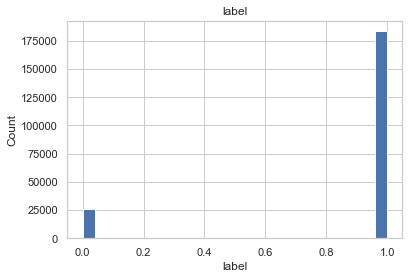

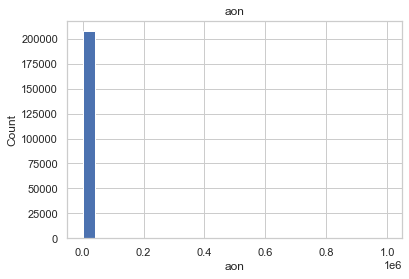

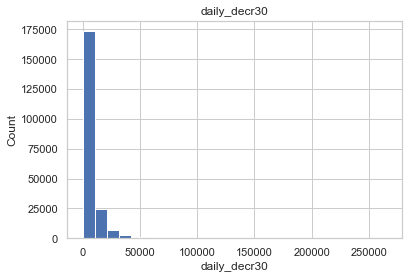

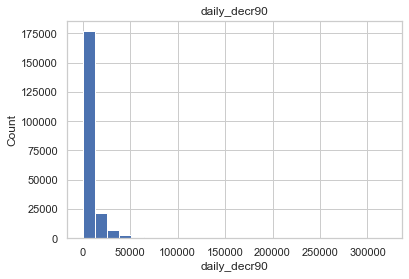

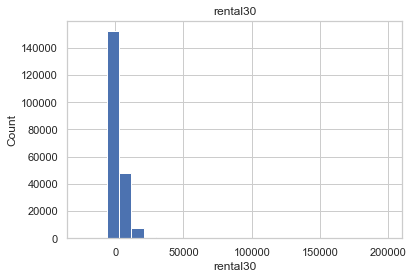

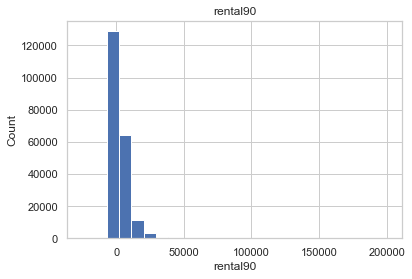

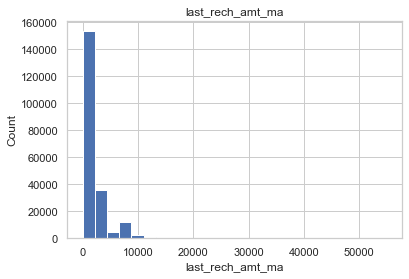

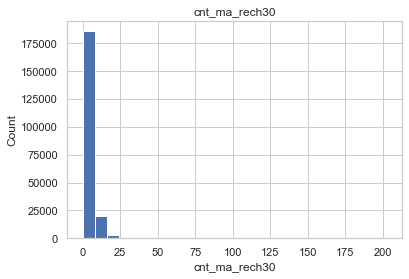

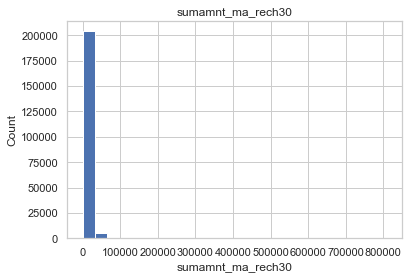

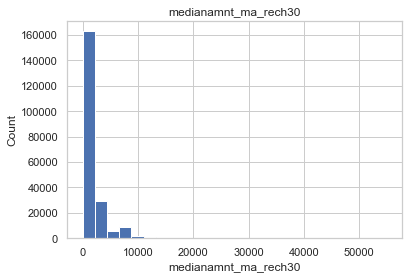

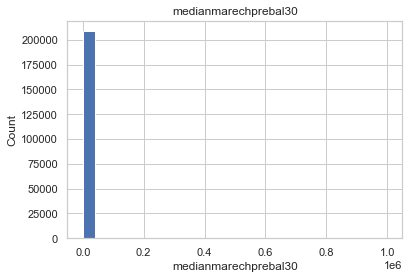

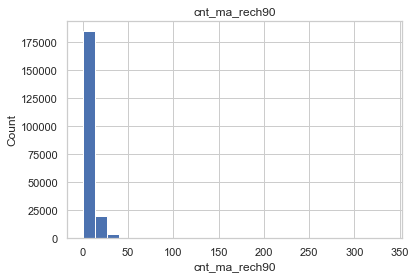

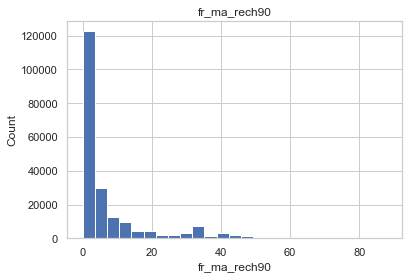

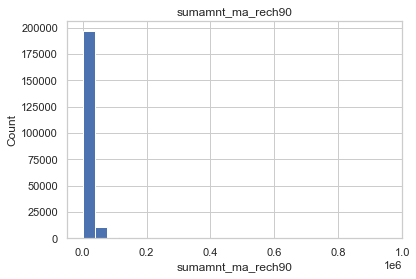

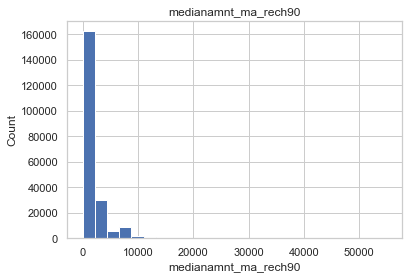

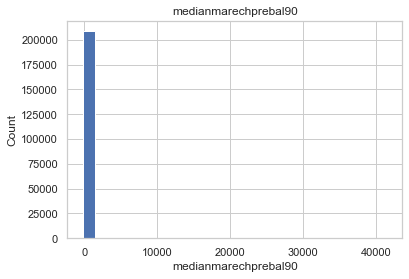

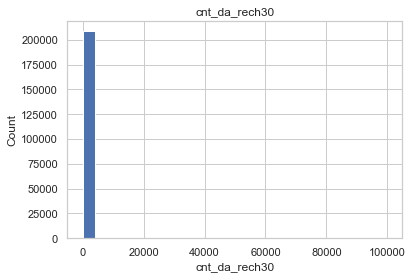

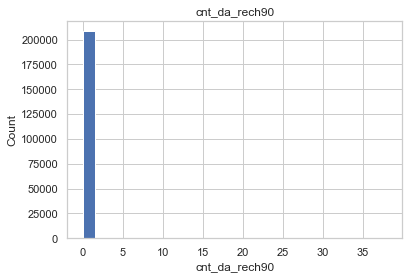

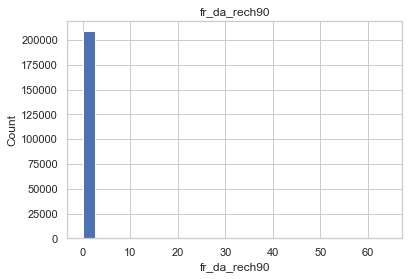

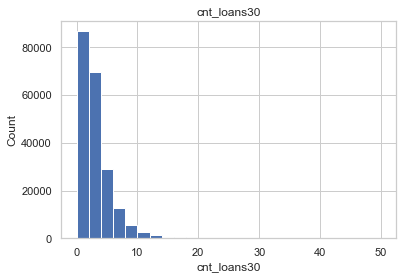

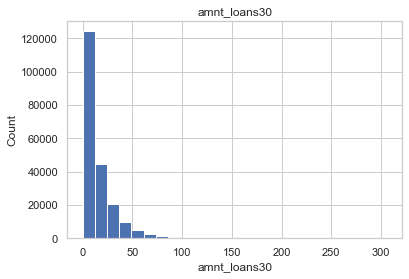

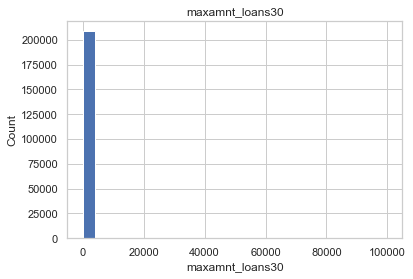

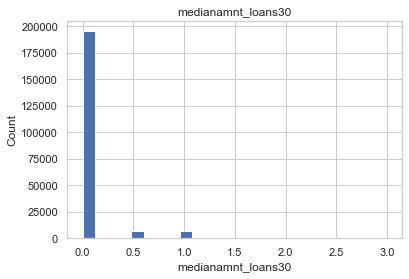

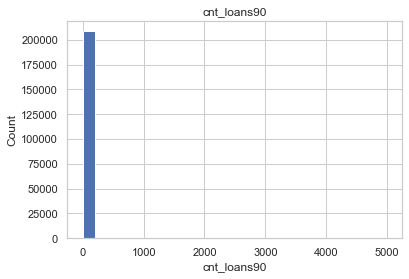

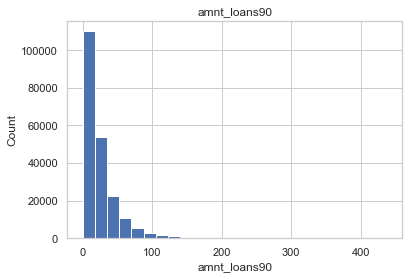

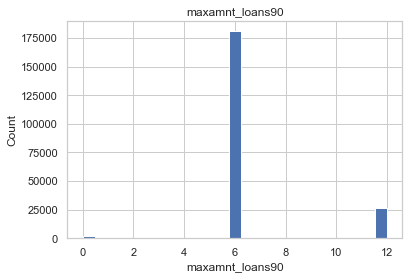

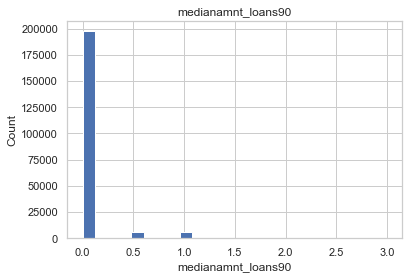

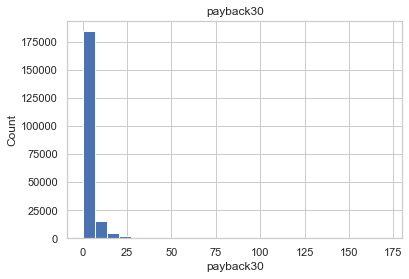

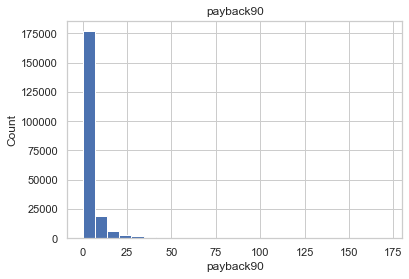

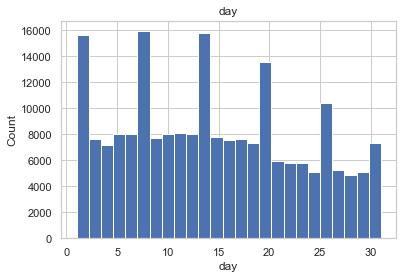

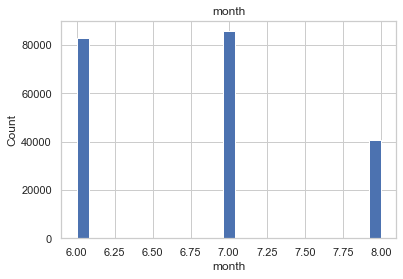

In [34]:
#Creating histogram of every column

for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

## Bivariate Analysis

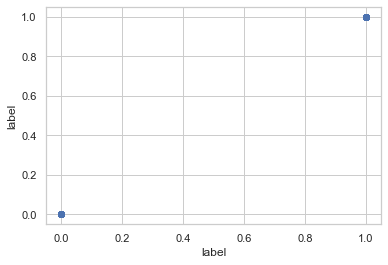

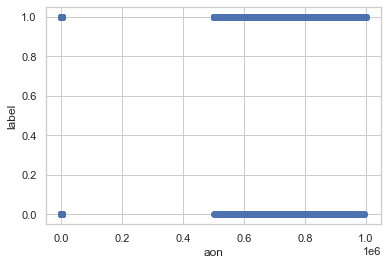

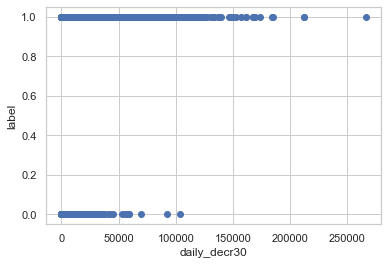

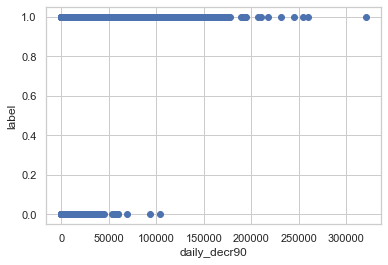

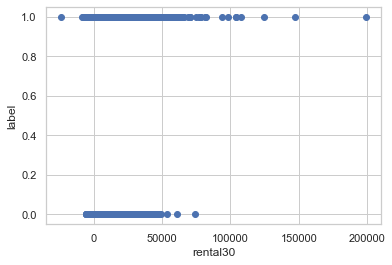

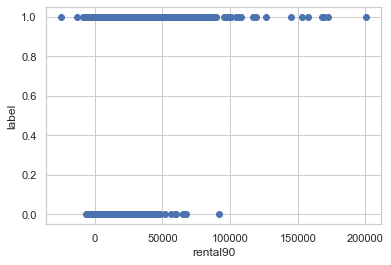

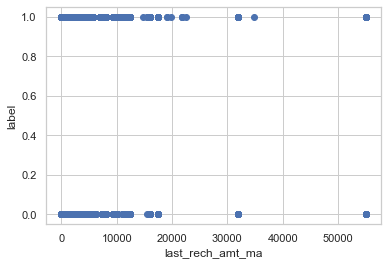

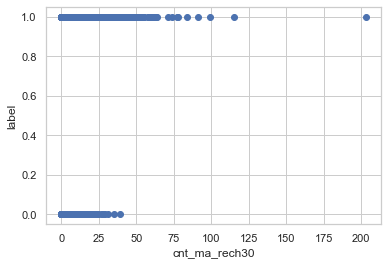

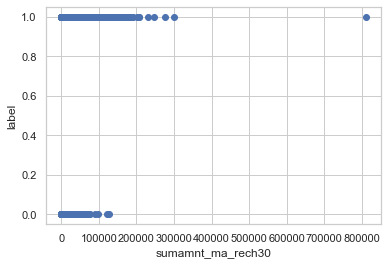

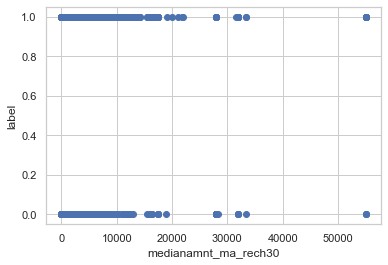

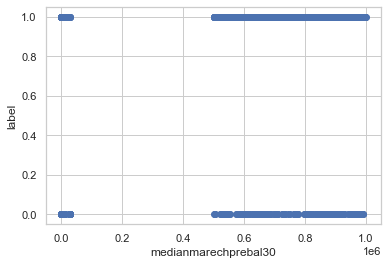

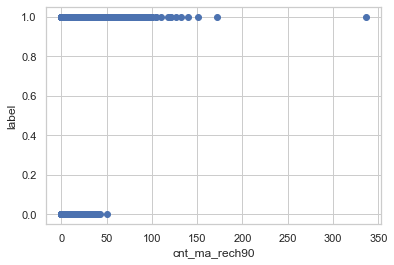

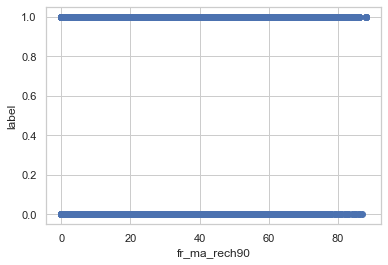

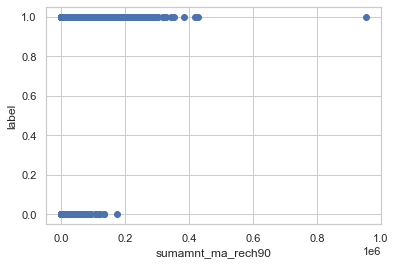

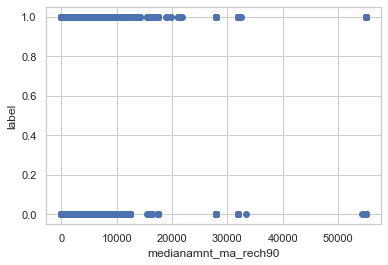

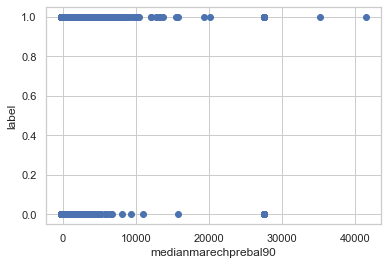

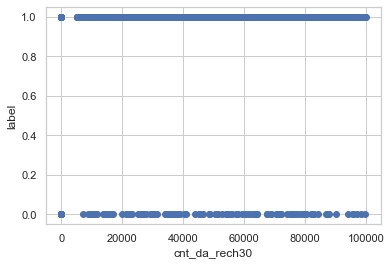

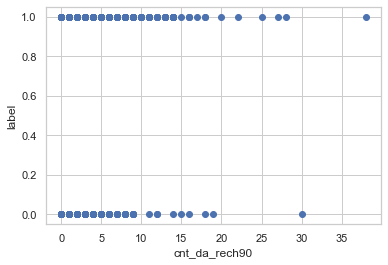

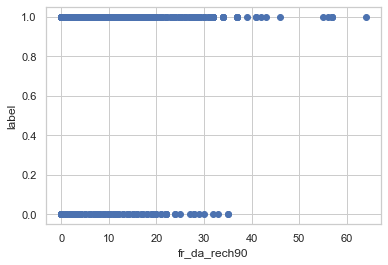

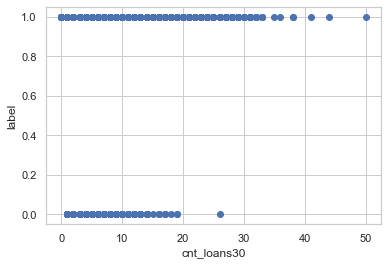

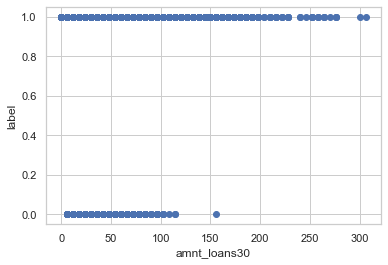

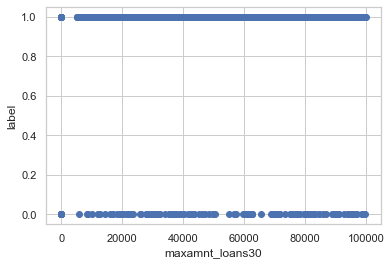

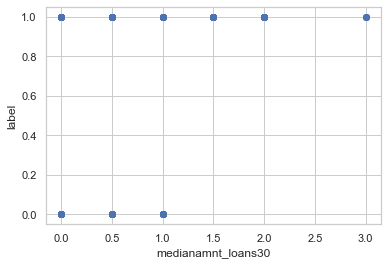

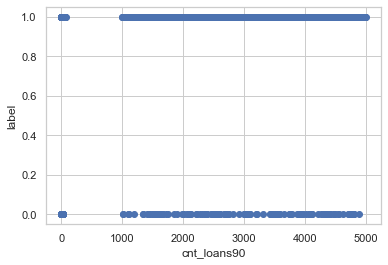

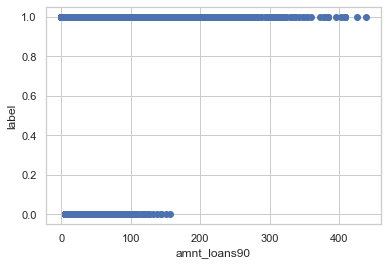

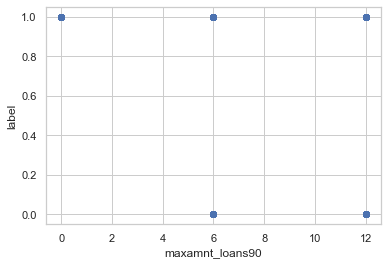

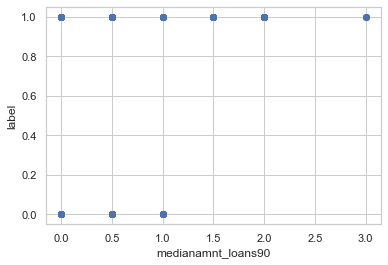

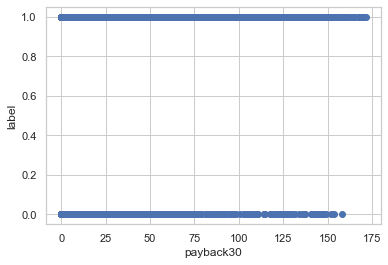

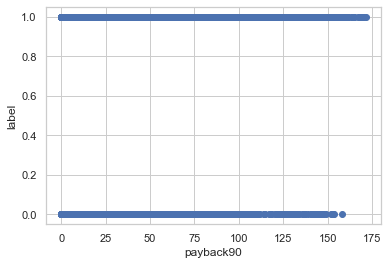

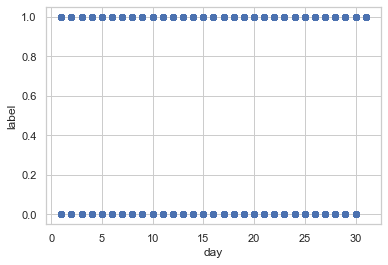

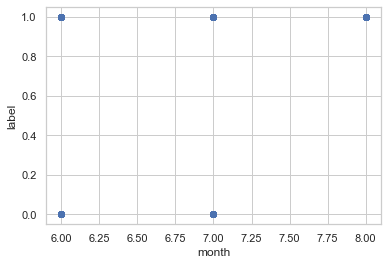

In [35]:
#Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['label'])
    plt.xlabel(col)
    plt.ylabel('label')
    plt.show()

<Figure size 1296x576 with 0 Axes>

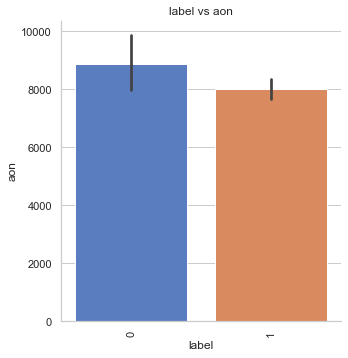

aon             label
-48.000000      1        120
                0         12
-47.000000      1         70
                0         14
-46.000000      1         77
                        ... 
 999190.832139  1          1
 999215.597054  1          1
 999391.307123  1          1
 999520.609388  1          1
 999860.755168  1          1
Name: label, Length: 6607, dtype: int64


In [36]:
#Factor plot of label vs aon
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='aon',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs aon')
plt.xticks(rotation='vertical')
plt.ylabel('aon')
plt.show()


print(df.groupby('aon')['label'].value_counts())

Observation:
    
    If the aon is high the number of defaulters are more.

<Figure size 1296x576 with 0 Axes>

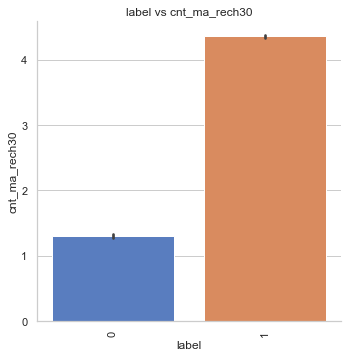

cnt_ma_rech30  label
0              1        16856
               0        11123
1              1        29561
               0         7677
2              1        27936
                        ...  
84             1            1
91             1            1
99             1            1
115            1            1
203            1            1
Name: label, Length: 103, dtype: int64


In [37]:
#Factor plot of label vs cnt_ma_rech30
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='cnt_ma_rech30',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs cnt_ma_rech30')
plt.xticks(rotation='vertical')
plt.ylabel('cnt_ma_rech30')
plt.show()

print(df.groupby('cnt_ma_rech30')['label'].value_counts())

Observation:
    
    If Number of times main account got recharged in last 30 days(cnt_ma_rech30) is more then there is less chance of default.

<Figure size 1296x576 with 0 Axes>

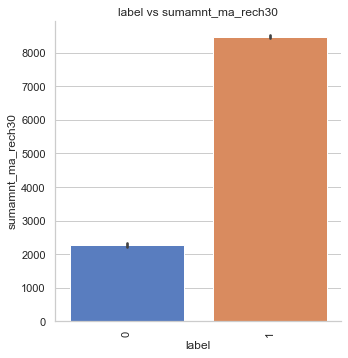

sumamnt_ma_rech30  label
0.0                1        16856
                   0        11123
173.0              1          364
                   0           81
177.0              1            1
                            ...  
232000.0           1            1
247227.0           1            1
275010.0           1            1
299391.0           1            1
810096.0           1            1
Name: label, Length: 16417, dtype: int64


In [38]:
#Factor plot of label vs sumamnt_ma_rech30
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='sumamnt_ma_rech30',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs sumamnt_ma_rech30')
plt.xticks(rotation='vertical')
plt.ylabel('sumamnt_ma_rech30')
plt.show()

print(df.groupby('sumamnt_ma_rech30')['label'].value_counts())

Observation:
    
    If Total amount of recharge in main account over last 30 days(sumamnt_ma_rech30) is more the chances of default are less.

<Figure size 1296x576 with 0 Axes>

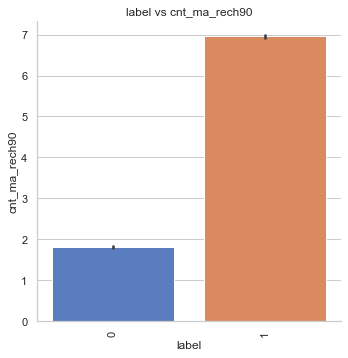

cnt_ma_rech90  label
0              1        11801
               0         9149
1              1        20409
               0         7489
2              1        20431
                        ...  
132            1            1
140            1            1
151            1            1
172            1            1
336            1            1
Name: label, Length: 150, dtype: int64


In [39]:
#Factor plot of label vs cnt_ma_rech90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='cnt_ma_rech90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs cnt_ma_rech90')
plt.xticks(rotation='vertical')
plt.ylabel('cnt_ma_rech90')
plt.show()

print(df.groupby('cnt_ma_rech90')['label'].value_counts())

Observation:
    
    If Number of times main account got recharged in last 90 days(cnt_ma_rech90) is more then there is less chance of default.

<Figure size 1296x576 with 0 Axes>

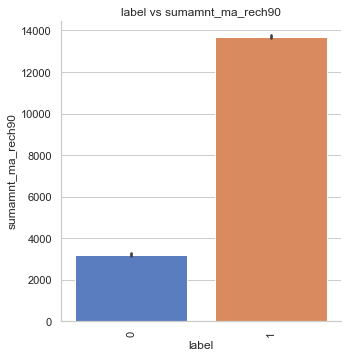

sumamnt_ma_rech90  label
0                  1        11801
                   0         9149
173                1          441
                   0          153
177                1            4
                            ...  
352813             1            1
383272             1            1
418133             1            1
429256             1            1
953036             1            1
Name: label, Length: 34069, dtype: int64


In [40]:
#Factor plot of label vs sumamnt_ma_rech90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='sumamnt_ma_rech90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs sumamnt_ma_rech90')
plt.xticks(rotation='vertical')
plt.ylabel('sumamnt_ma_rech90')
plt.show()

print(df.groupby('sumamnt_ma_rech90')['label'].value_counts())

Observation:
    
    If Total amount of recharge in main account over last 30 days(sumamnt_ma_rech90) is more the chances of default are less.

<Figure size 1296x576 with 0 Axes>

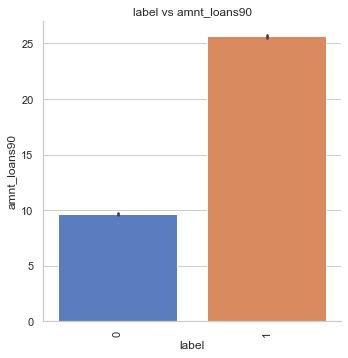

amnt_loans90  label
0             1         2043
6             1        50284
              0        18847
12            1        34941
              0         3967
                       ...  
396           1            1
402           1            1
408           1            4
426           1            1
438           1            1
Name: label, Length: 95, dtype: int64


In [41]:
#Factor plot of label vs amnt_loans90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='amnt_loans90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs amnt_loans90')
plt.xticks(rotation='vertical')
plt.ylabel('amnt_loans90')
plt.show()

print(df.groupby('amnt_loans90')['label'].value_counts())

Observation:
    
    If Total amount of loans taken by user in last 90 days(amnt_loans90) is high there is less chance of default.

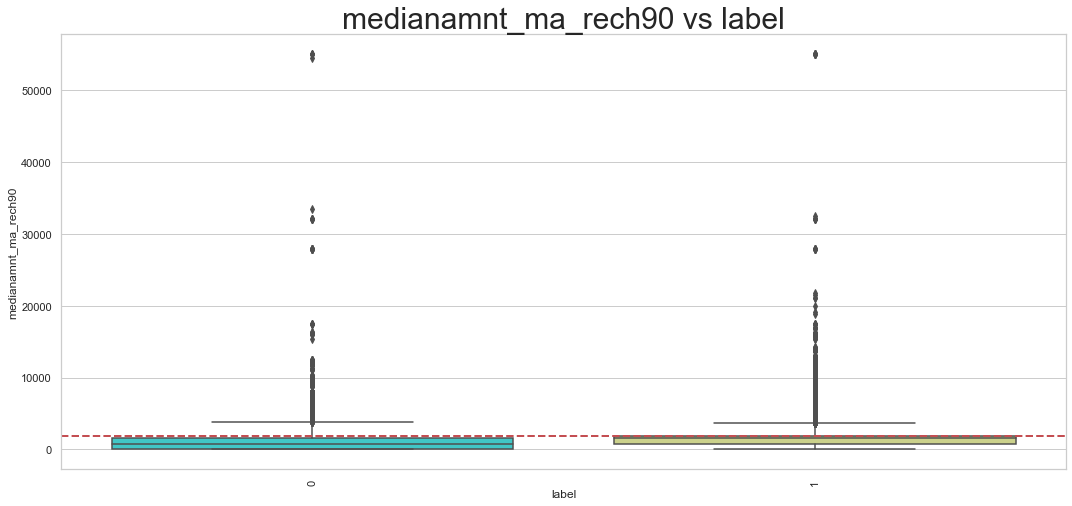

In [42]:
#label vs medianamnt_ma_rech90

plt.figure(figsize=(18,8))
mean_price=np.mean(df['medianamnt_ma_rech90'])
sns.boxplot(y='medianamnt_ma_rech90',x='label',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("medianamnt_ma_rech90 vs label",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

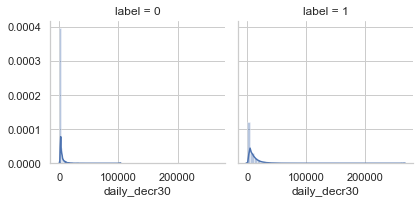

In [43]:
#Exploring label vs daily_decr30 via FaceGrid

facet= sns.FacetGrid(df, col='label')
facet.map(sns.distplot, "daily_decr30")
plt.show()

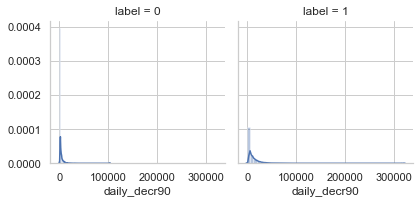

In [44]:
#Exploring label vs daily_decr90 via FaceGrid

facet= sns.FacetGrid(df, col='label')
facet.map(sns.distplot, "daily_decr90")
plt.show()

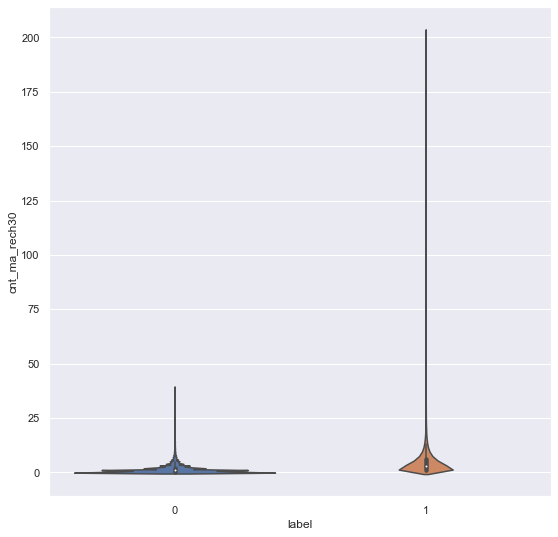

In [45]:
#Violinplot of label vs cnt_ma_rech30

sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df['label'],y=df['cnt_ma_rech30'],data=df)

Observation:
    
    If Number of times main account got recharged in last 30 days(cnt_ma_rech30) is more then there is less chance of default.

## Multivariate Analysis

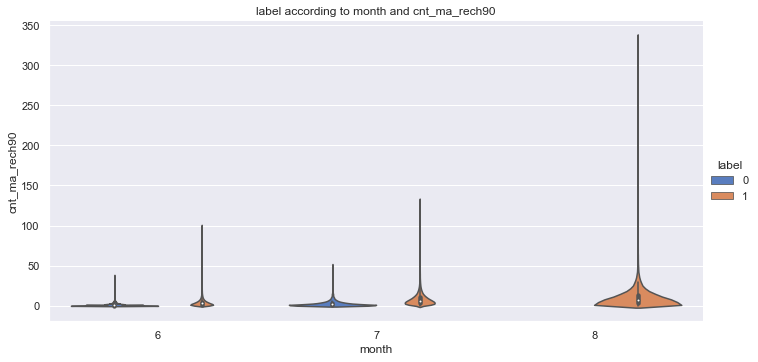

In [46]:
#checking month and cnt_ma_rech90 with respect to label

sns.factorplot(x='month',y='cnt_ma_rech90',hue='label',data=df,kind='violin',size=5,palette='muted',aspect=2)
plt.title('label according to month and cnt_ma_rech90')
plt.xticks()
plt.ylabel('cnt_ma_rech90')
plt.show()

<Figure size 1008x1008 with 0 Axes>

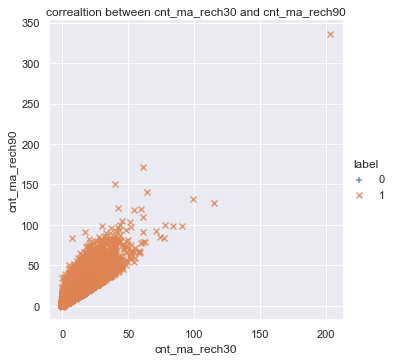

In [47]:
#scatter plot between cnt_ma_rech_30 and cnt_ma_rech90 with respect to label
plt.figure(figsize=(14,14))
sns.lmplot(x='cnt_ma_rech30',y='cnt_ma_rech90',fit_reg=False,data=df,hue='label',markers=['+','x'])
plt.xlabel('cnt_ma_rech30')
plt.title('correaltion between cnt_ma_rech30 and cnt_ma_rech90')
plt.ylabel('cnt_ma_rech90')
plt.show()

Observation:
    
    As cnt_ma_rech30 and cnt_ma_rech90 are increasing the number of non defaulters are also increasing.

<Figure size 1008x1008 with 0 Axes>

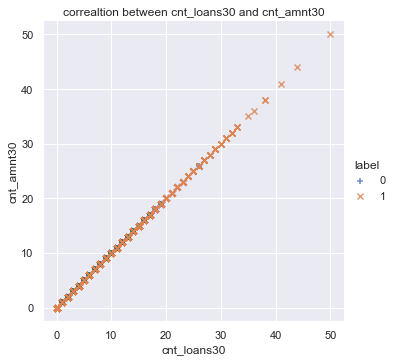

In [48]:
#scatter plot between cnt_loans30 and amnt_loans30 with respect to label
plt.figure(figsize=(14,14))
sns.lmplot(x='cnt_loans30',y='cnt_loans30',fit_reg=False,data=df,hue='label',markers=['+','x'])
plt.xlabel('cnt_loans30')
plt.title('correaltion between cnt_loans30 and cnt_amnt30')
plt.ylabel('cnt_amnt30')
plt.show()

Observation:
    
    As cnt_loans30 and cnt_amnt30 are increasing the number of non defaulters are also increasing.

<Figure size 1008x1008 with 0 Axes>

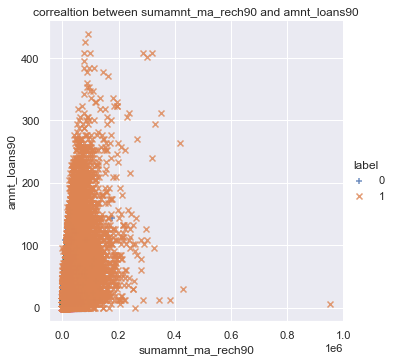

In [49]:
#scatter plot between sumamnt_ma_rech90 and amnt_loans90 with respect to label
plt.figure(figsize=(14,14))
sns.lmplot(x='sumamnt_ma_rech90',y='amnt_loans90',fit_reg=False,data=df,hue='label',markers=['+','x'])
plt.xlabel('sumamnt_ma_rech90')
plt.title('correaltion between sumamnt_ma_rech90 and amnt_loans90')
plt.ylabel('amnt_loans90')
plt.show()

Observation:
    
    As sumamnt_rech90 and amnt_loans30 are increasing the number of non defaulters are also increasing.

# 5.Pre-Processing Pipeline

## Checking skewness

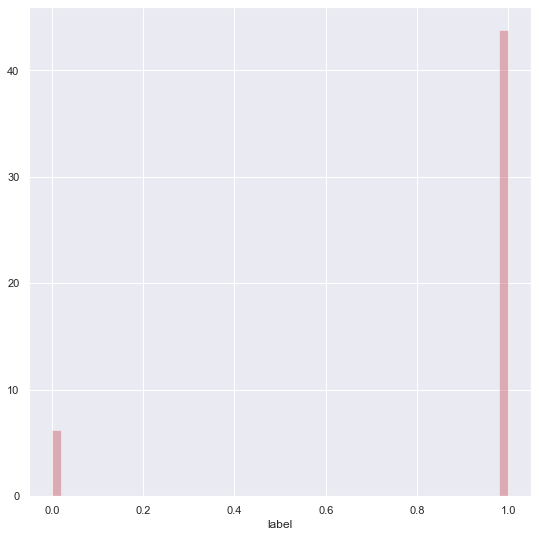

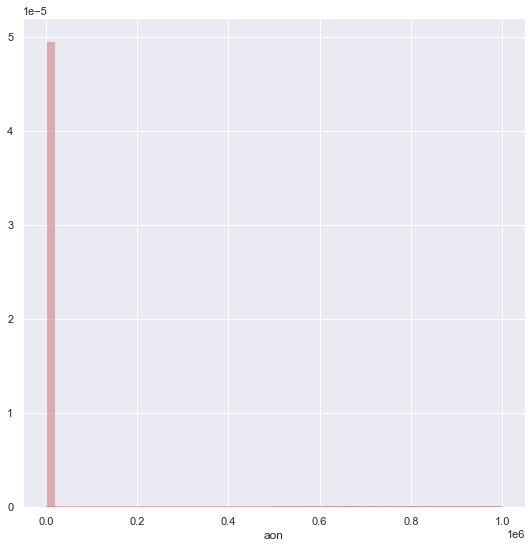

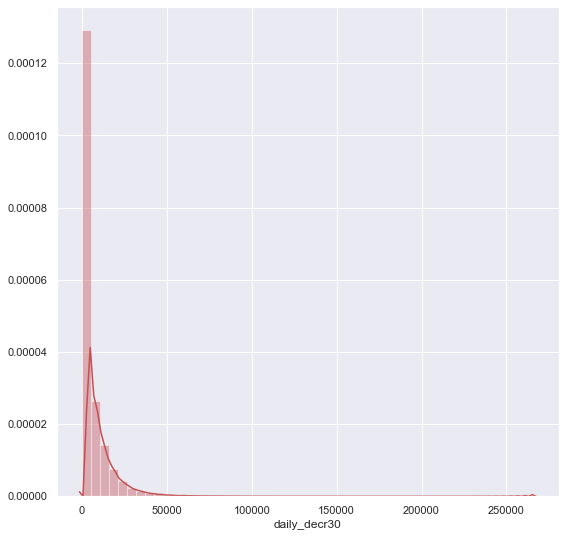

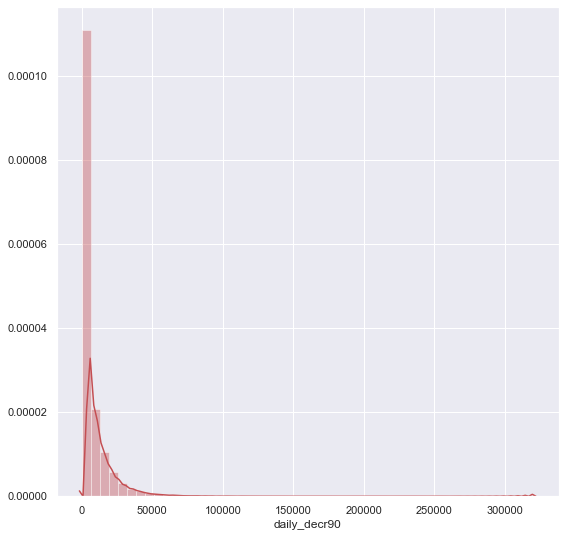

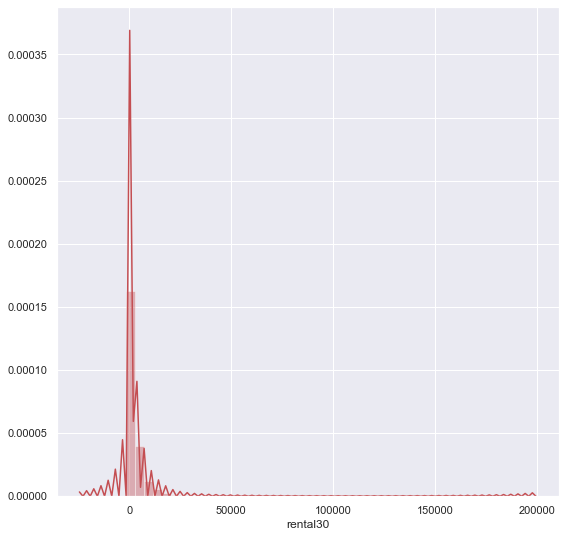

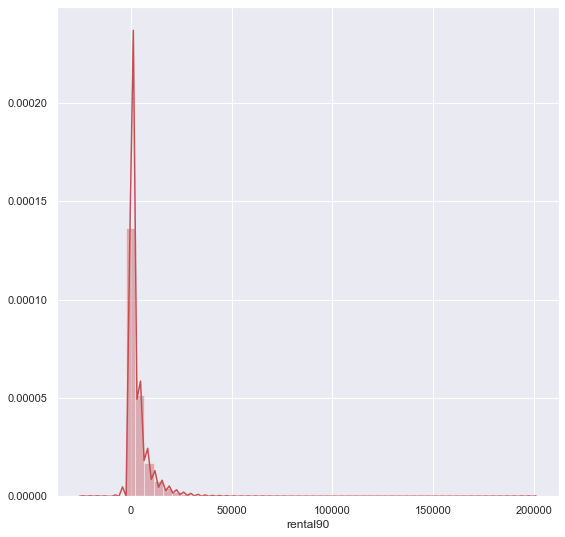

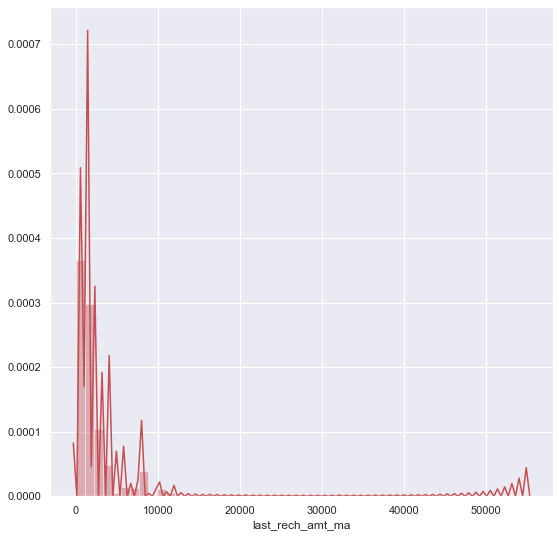

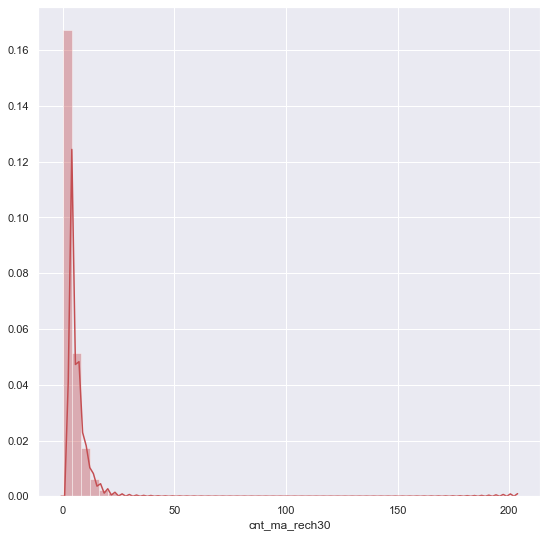

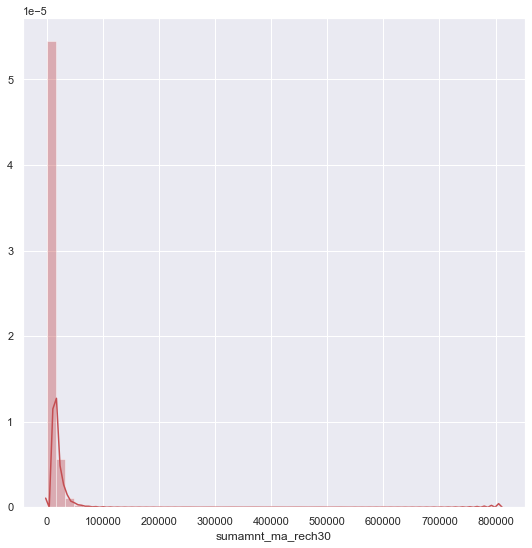

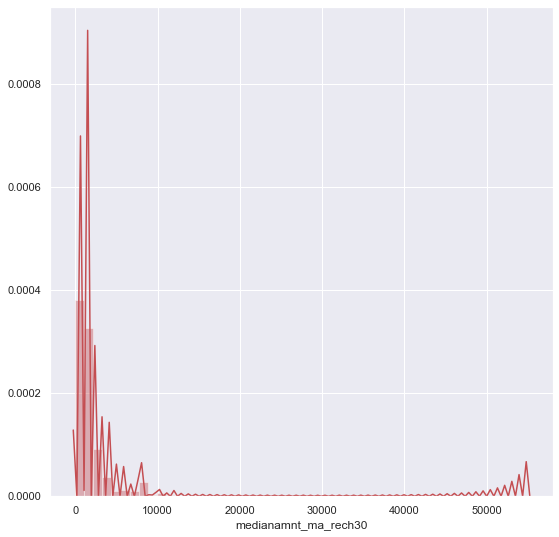

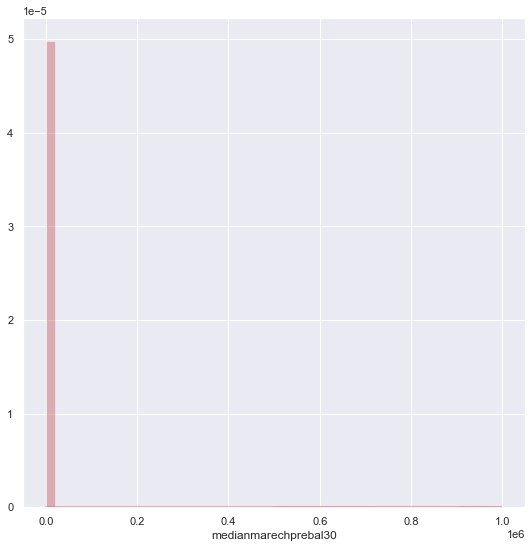

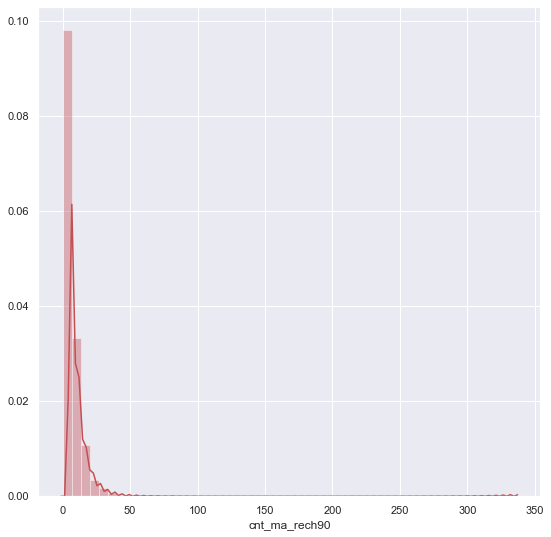

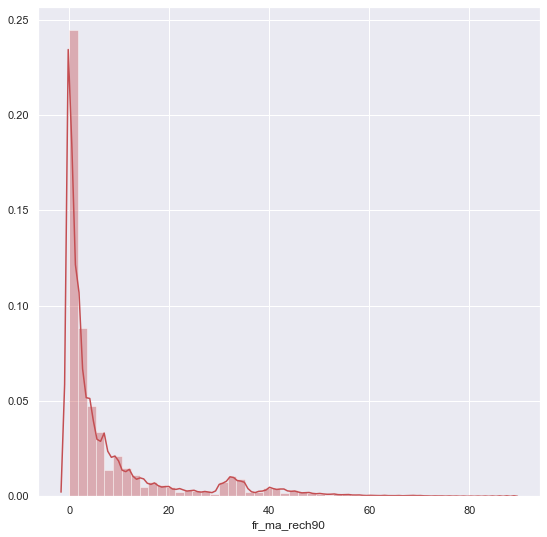

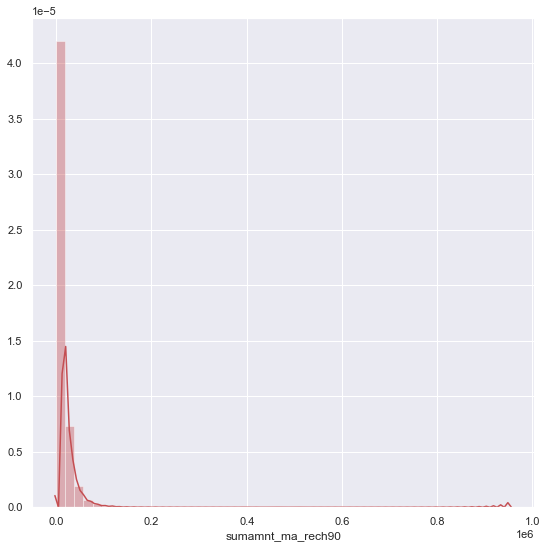

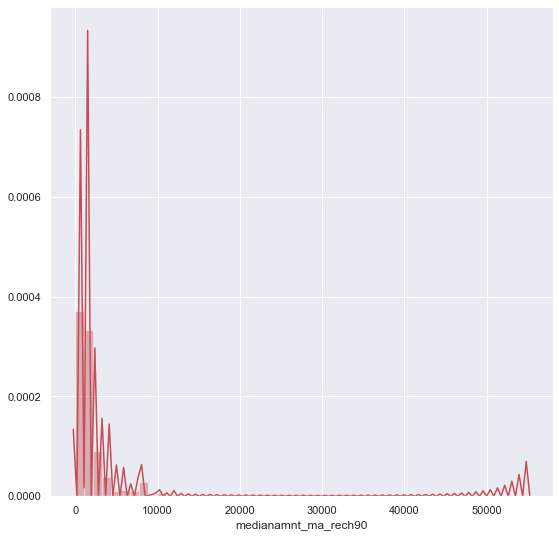

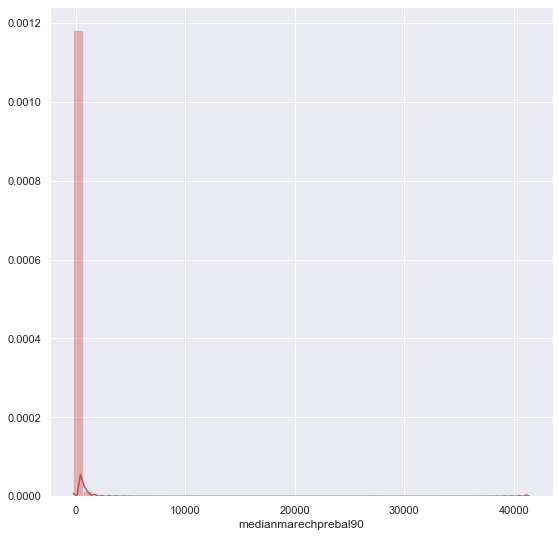

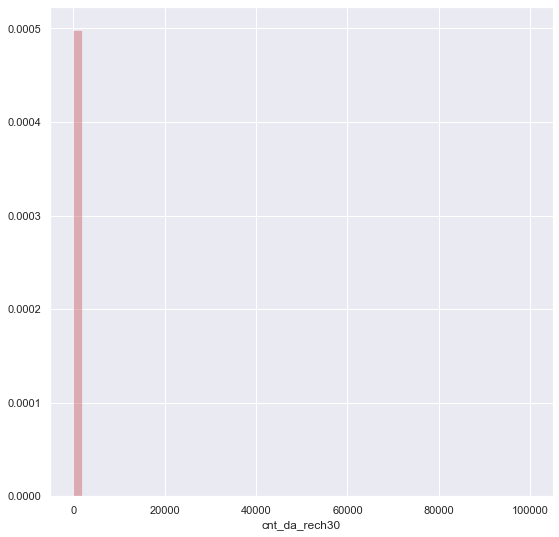

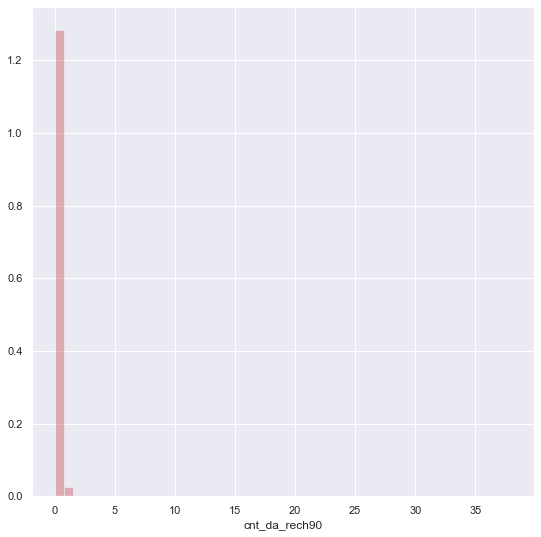

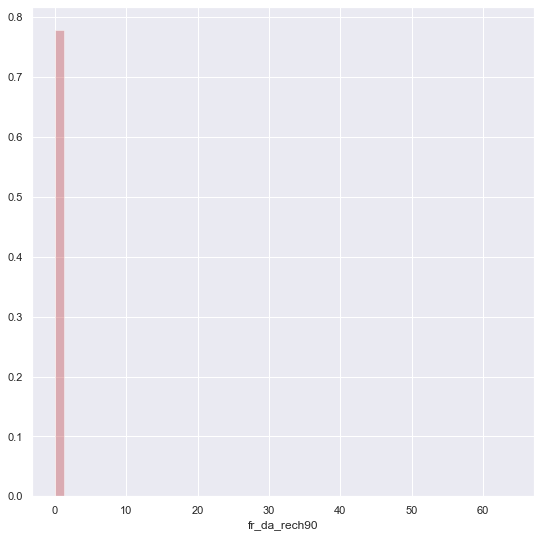

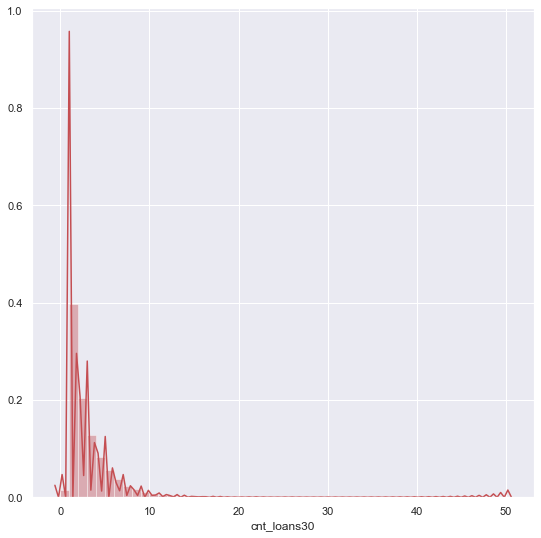

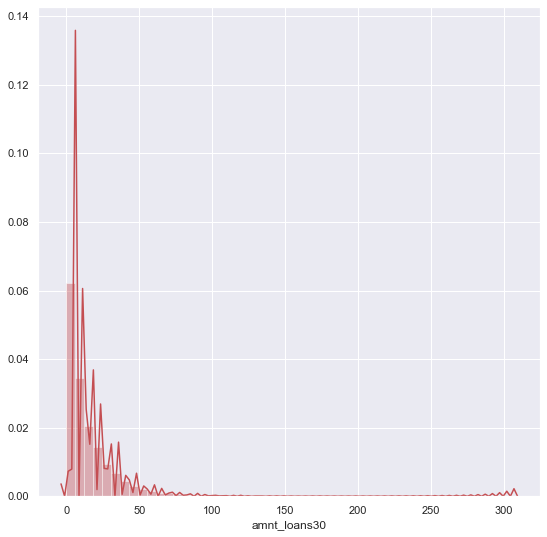

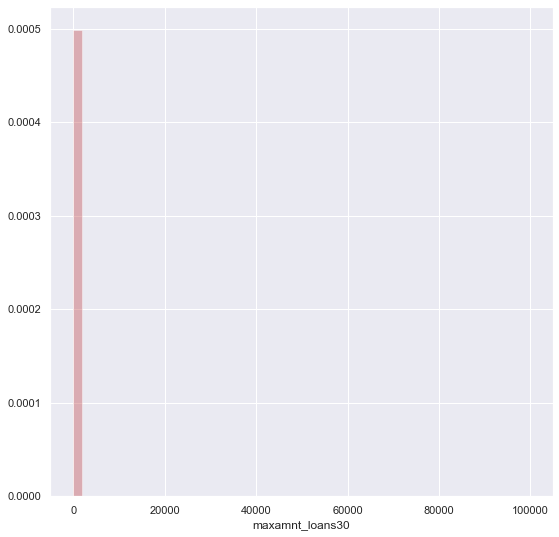

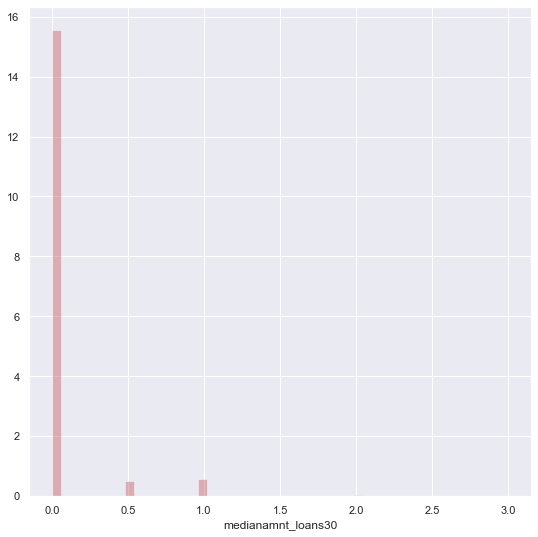

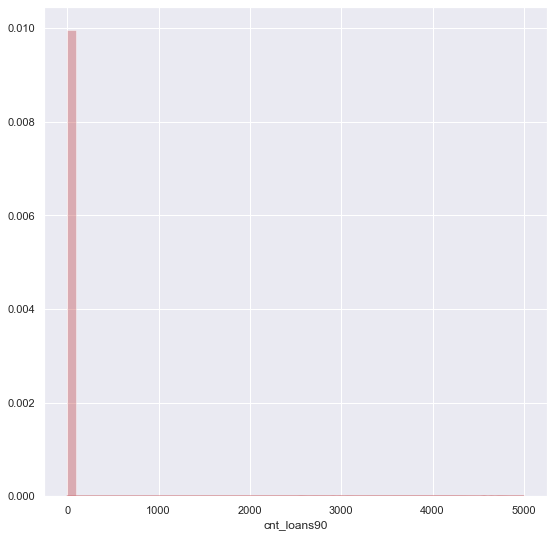

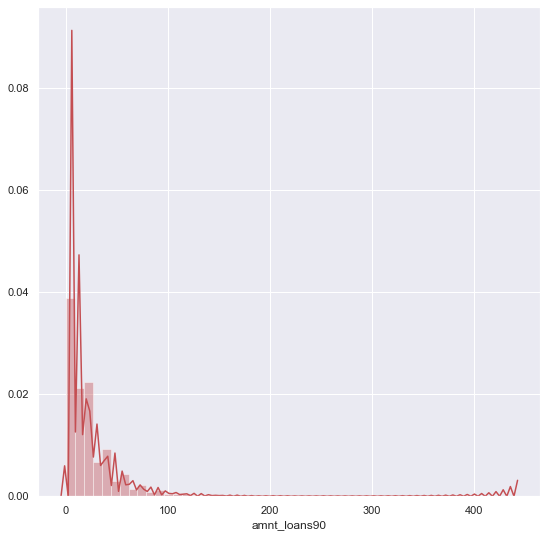

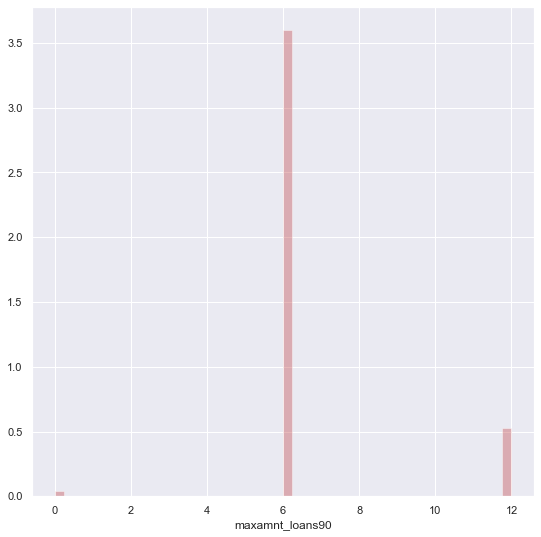

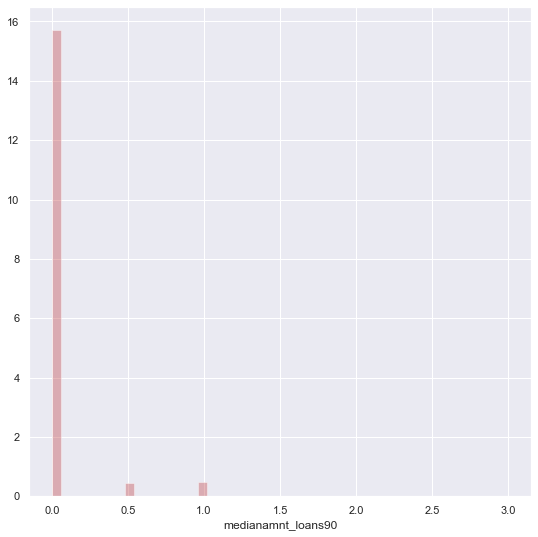

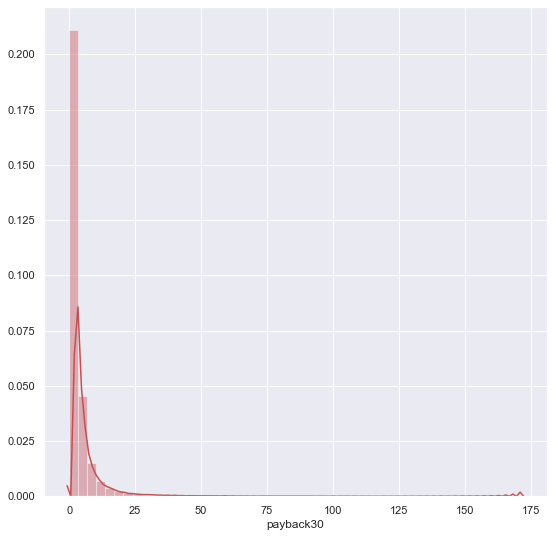

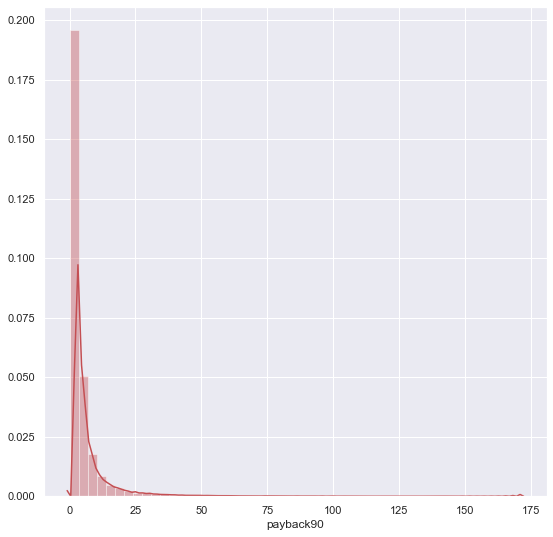

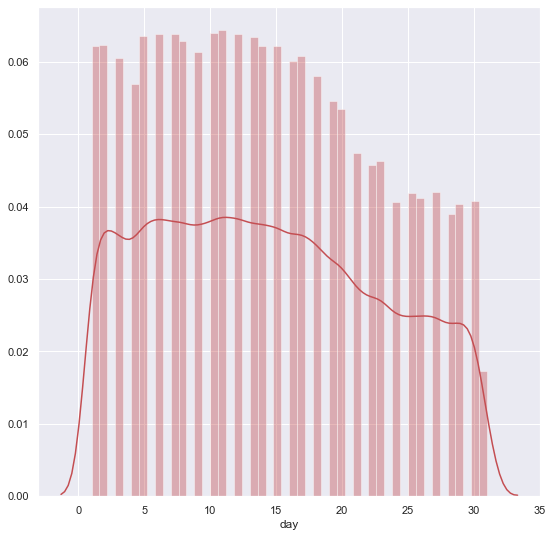

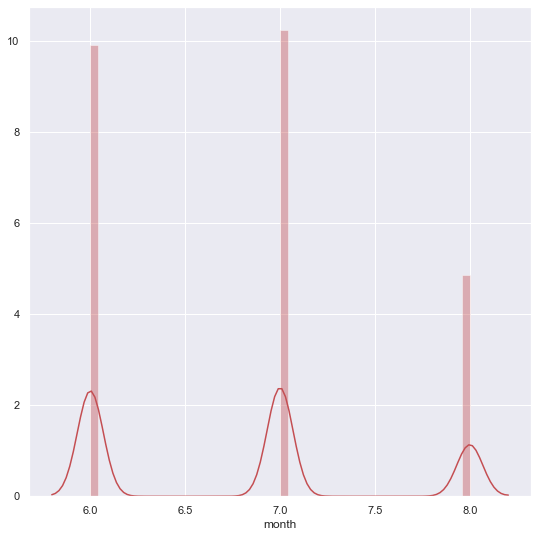

In [50]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [51]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
day           

## Handling skewness and outliers through Winsorization

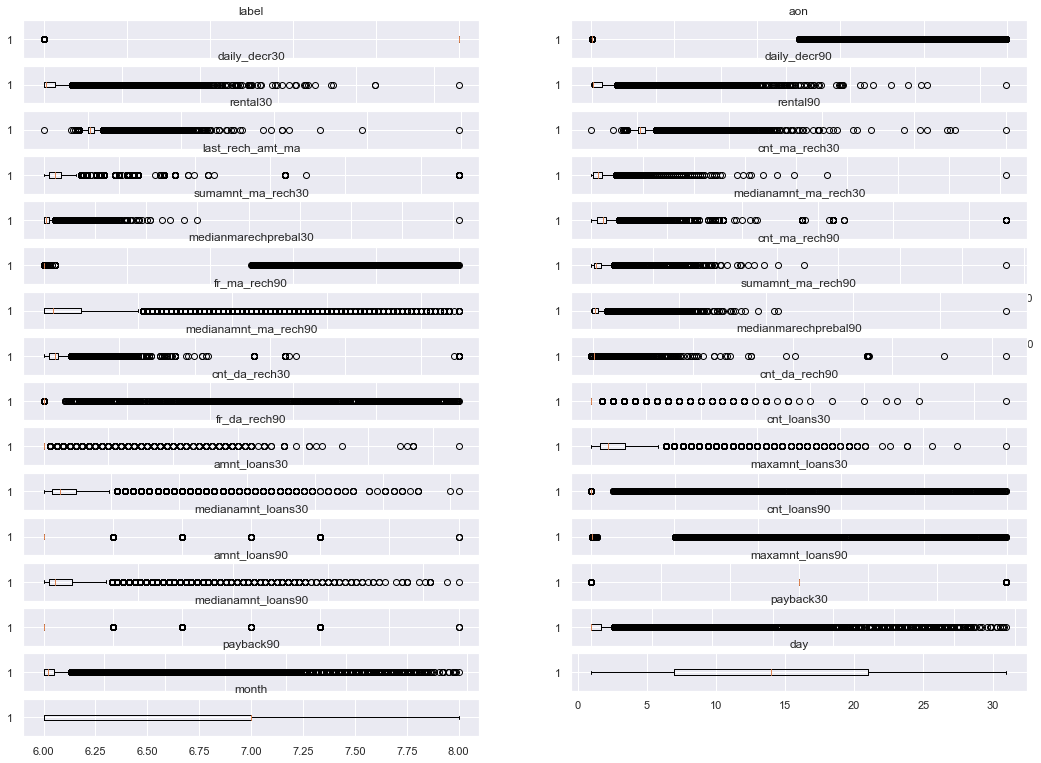

In [52]:
plt.figure(figsize=(18,14))

for i in range(len(df.columns)):
        plt.subplot(17,2,i+1)
        plt.boxplot(df[df.columns[i]], vert=False)
        plt.title(df.columns[i])
plt.show()

In [53]:
features = ['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','medianamnt_loans90','payback30','payback90','day','month']

In [54]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<5).all(axis=1)]
print(df_final.shape)

(209593, 31)
(194346, 31)


In [55]:
df=df_final

In [56]:
df_cap = df.copy()

In [57]:
from scipy import stats

In [58]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [59]:
percentile_capping(df_cap, features, 0.01, 0.10)

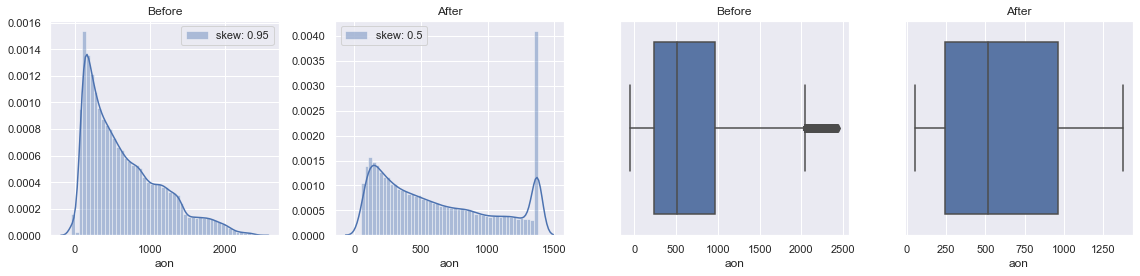

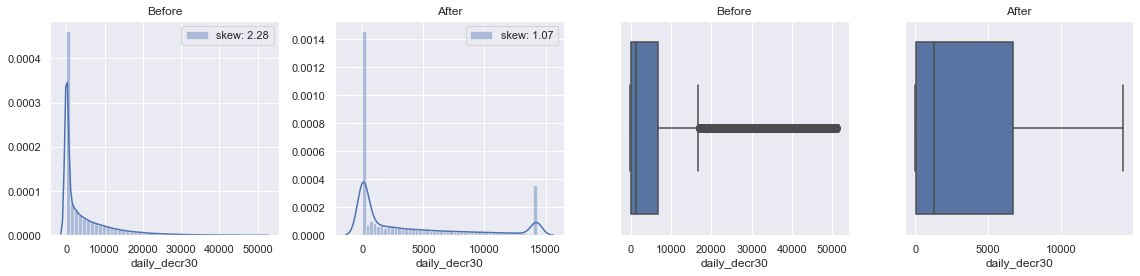

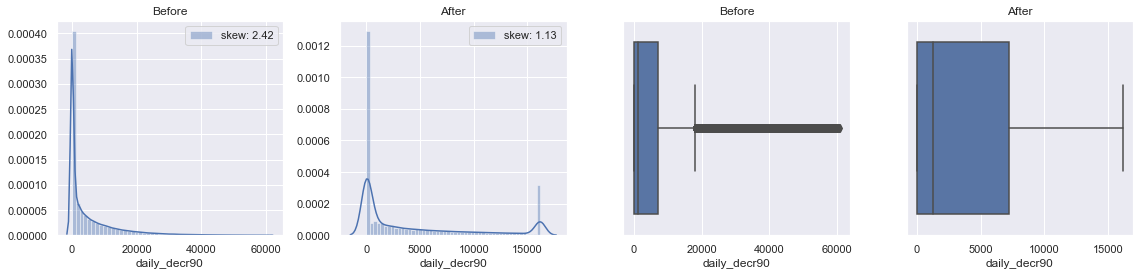

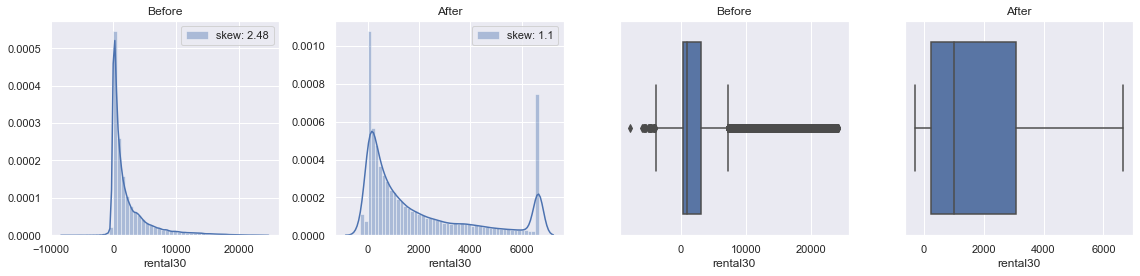

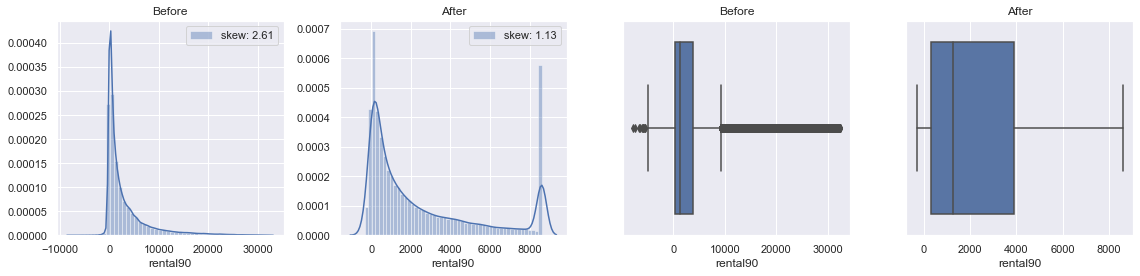

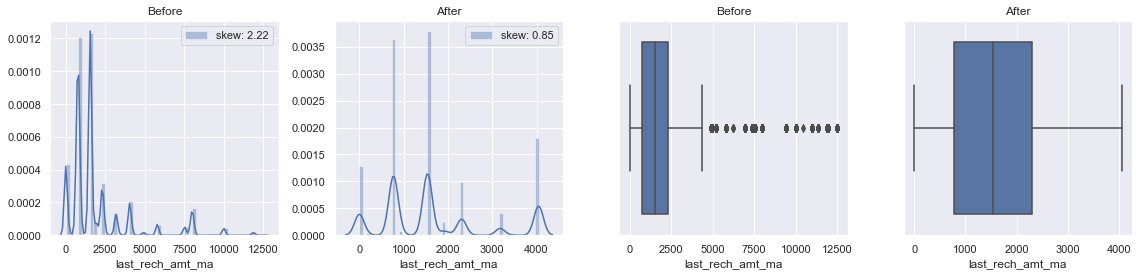

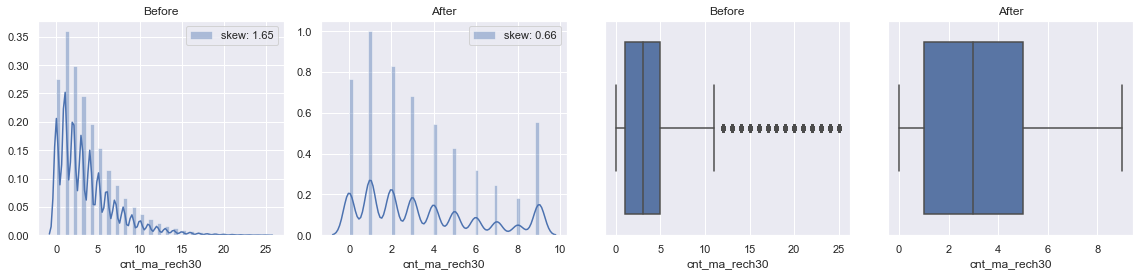

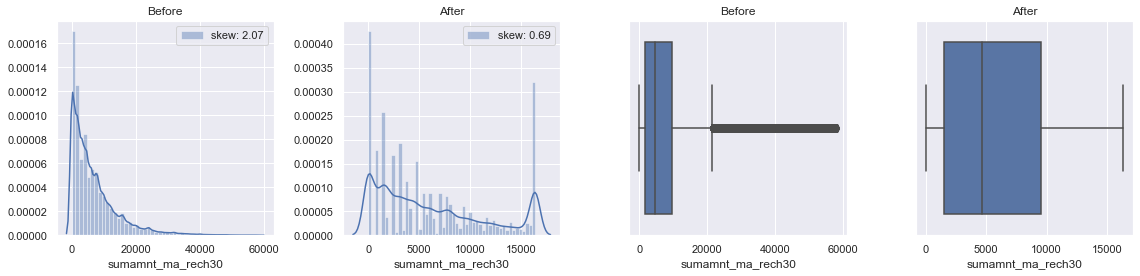

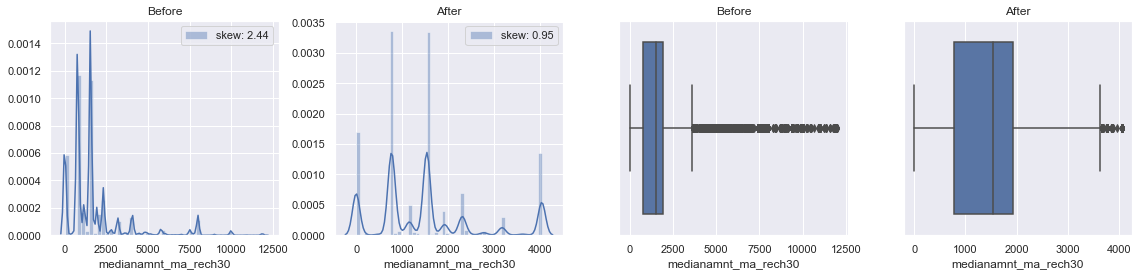

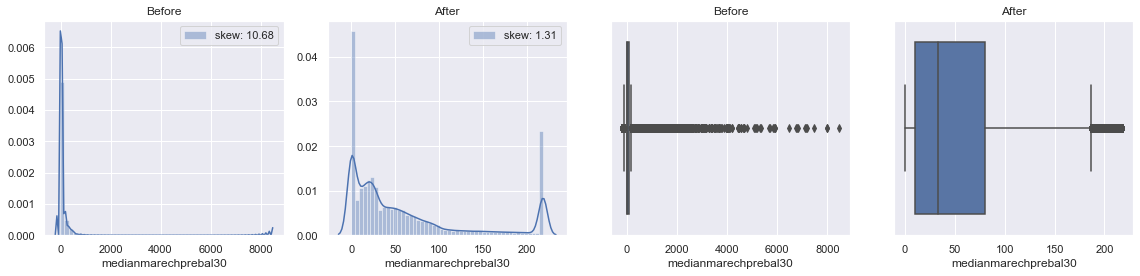

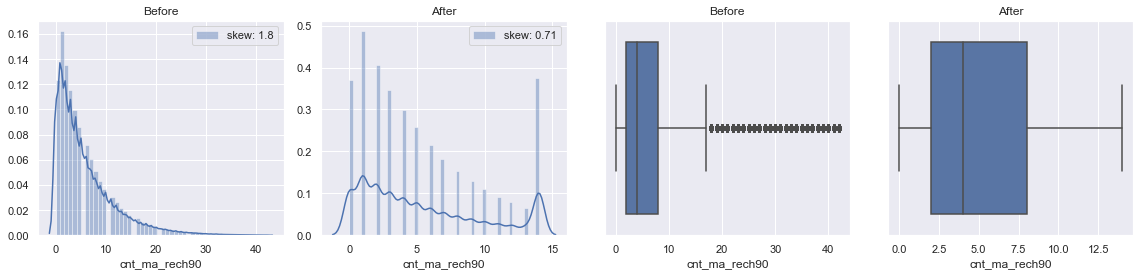

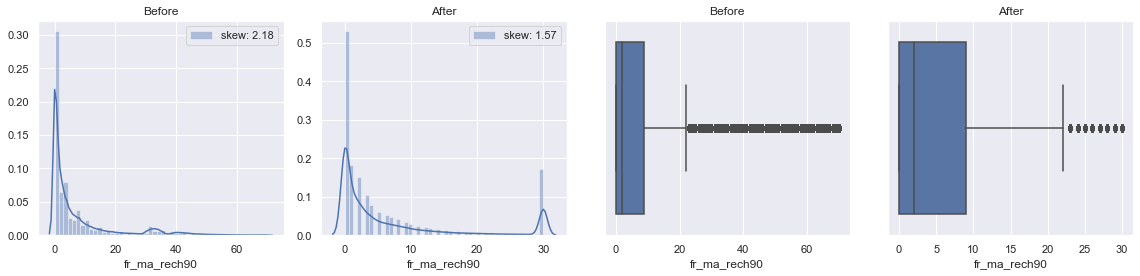

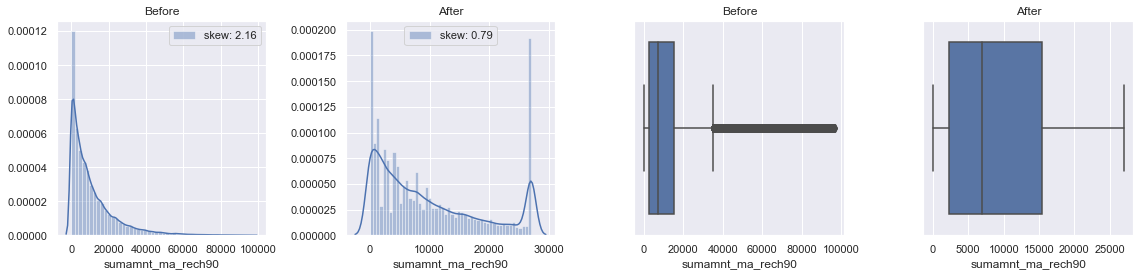

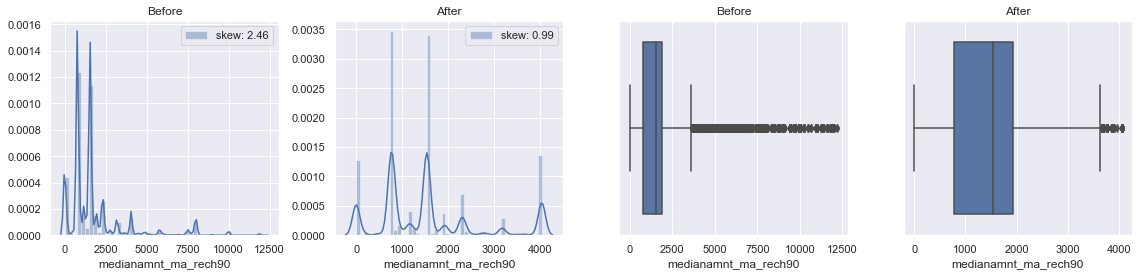

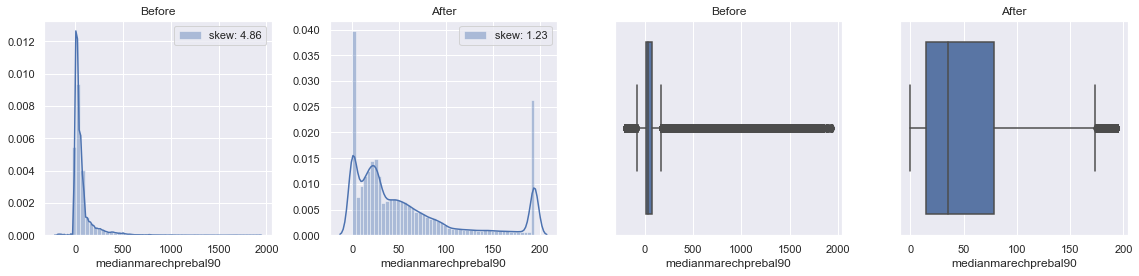

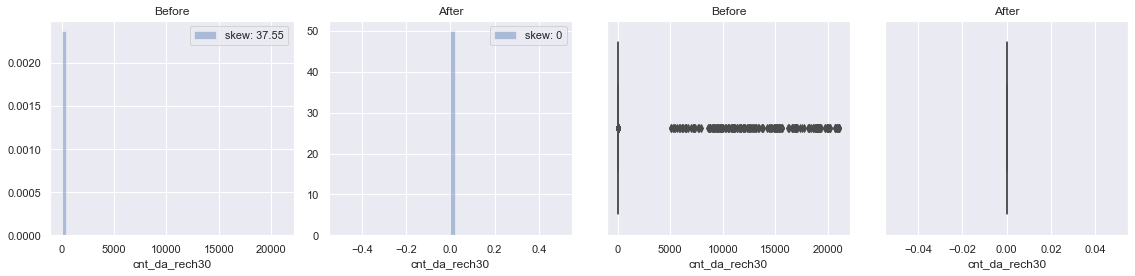

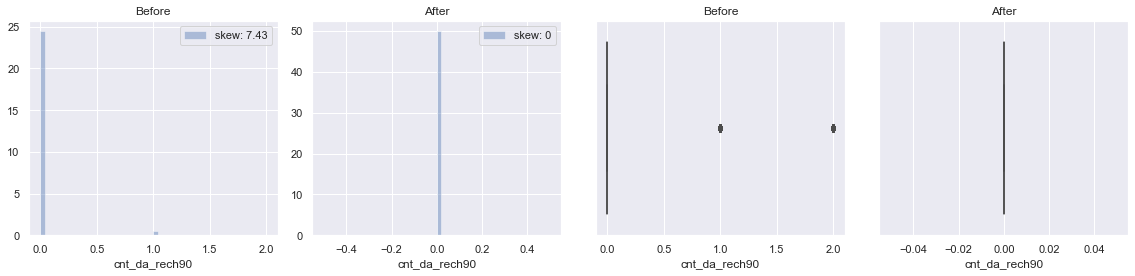

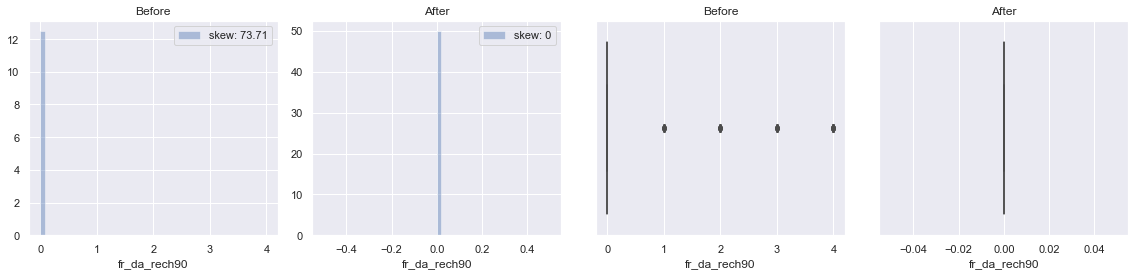

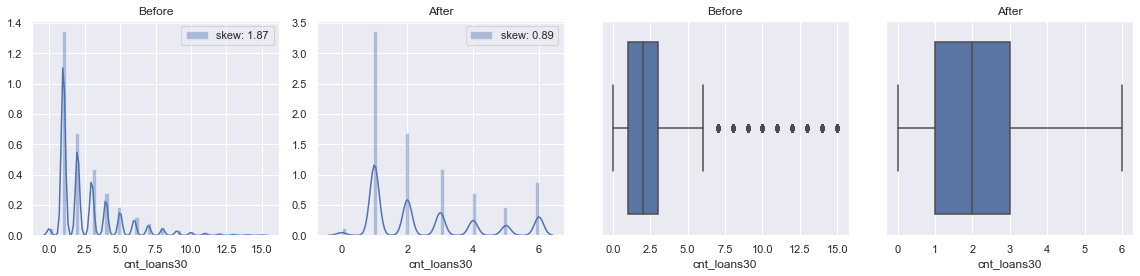

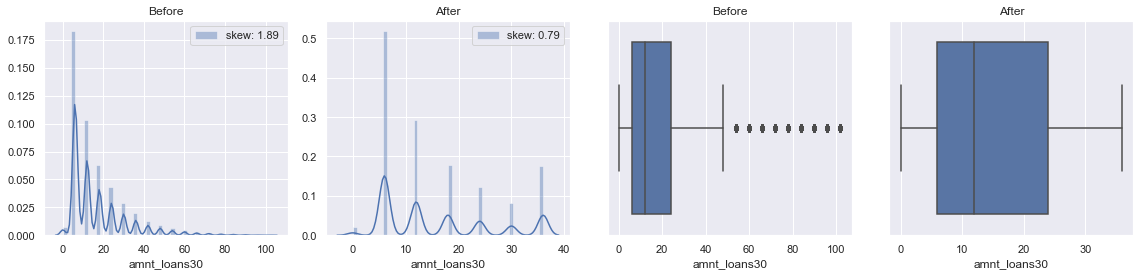

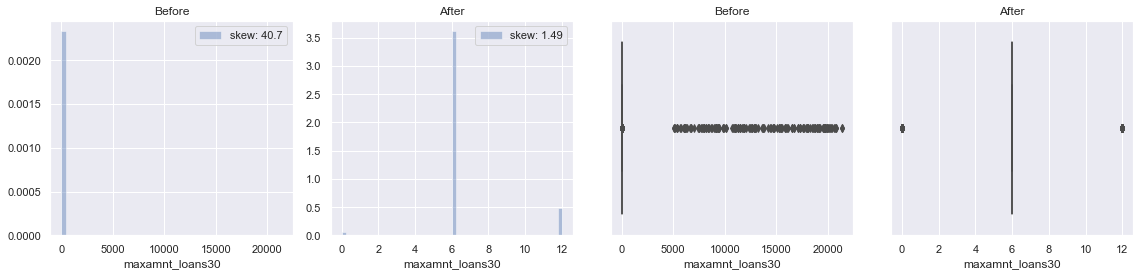

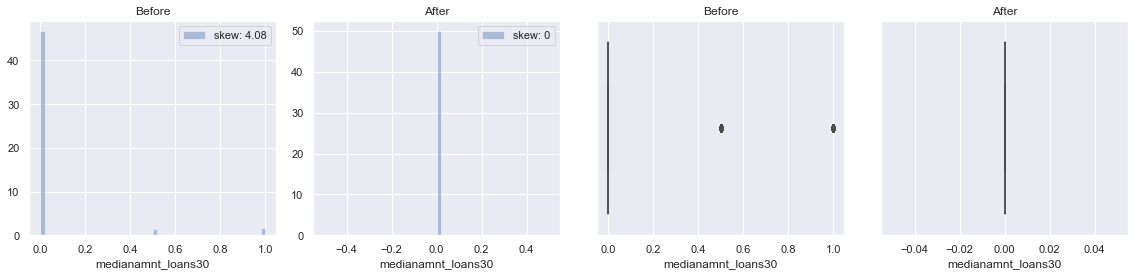

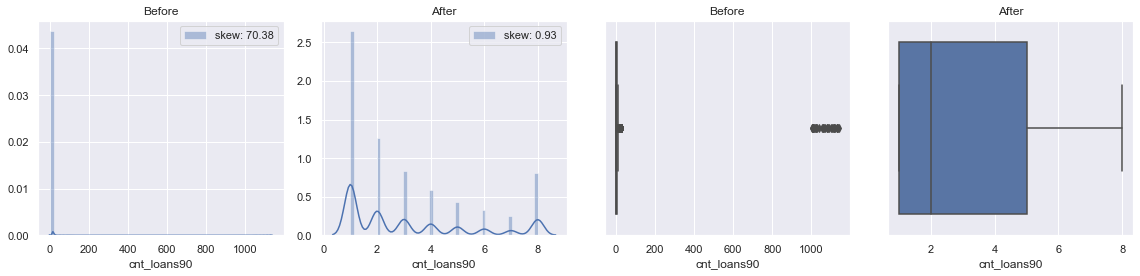

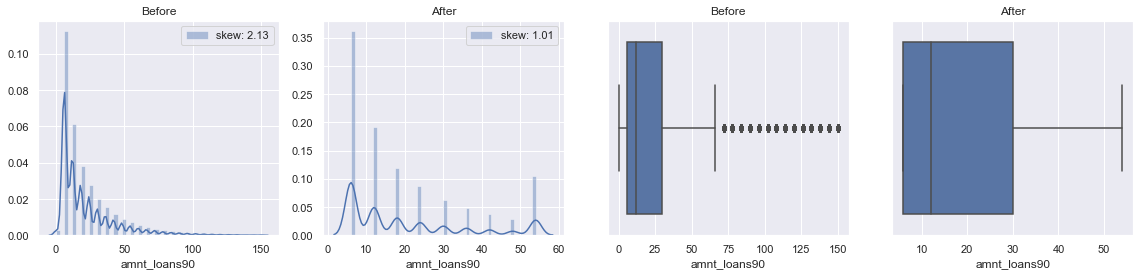

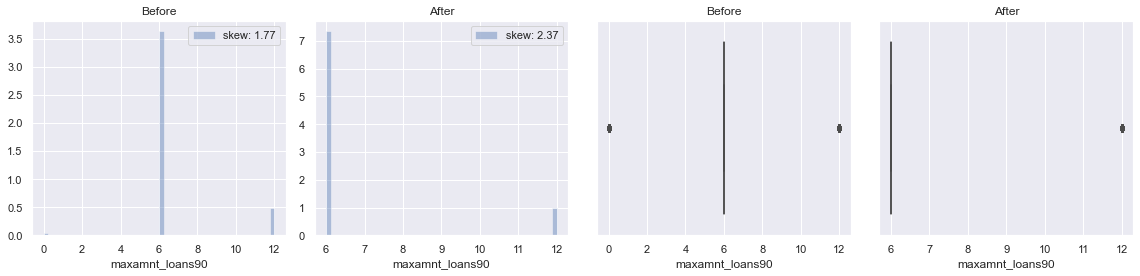

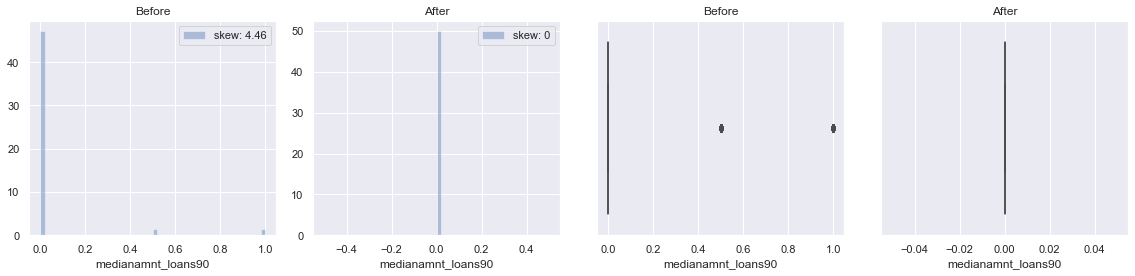

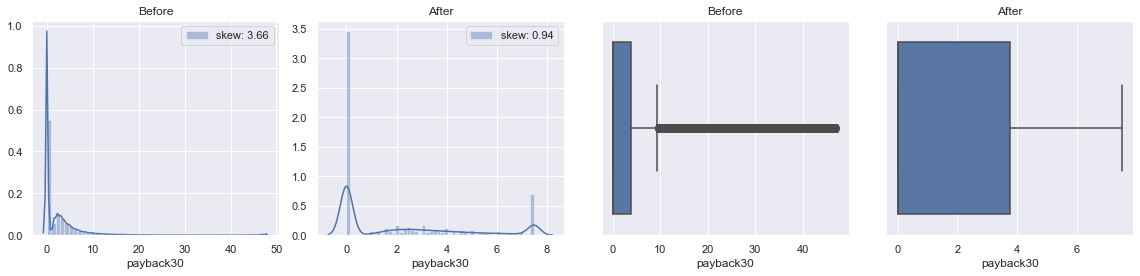

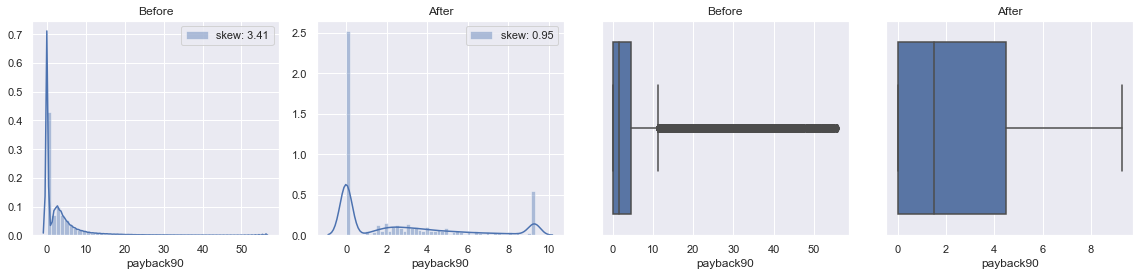

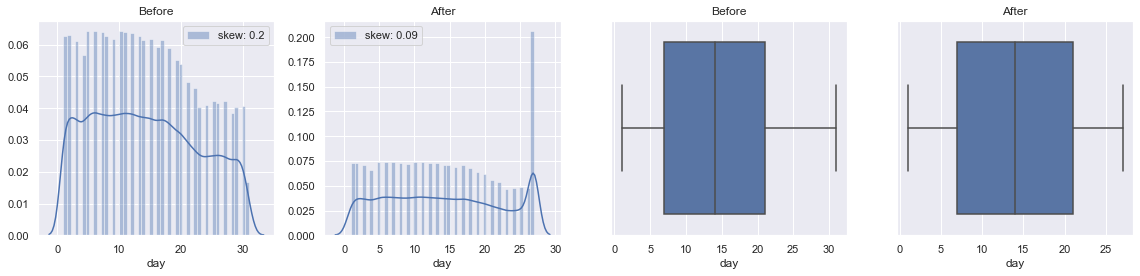

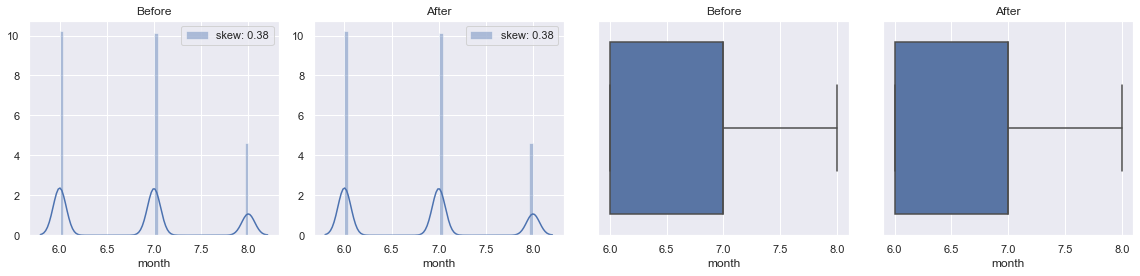

In [60]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [61]:
df_cap.skew()

label                  -2.242737
aon                     0.495635
daily_decr30            1.072841
daily_decr90            1.133561
rental30                1.095992
rental90                1.125867
last_rech_amt_ma        0.850541
cnt_ma_rech30           0.657301
sumamnt_ma_rech30       0.691258
medianamnt_ma_rech30    0.949679
medianmarechprebal30    1.311814
cnt_ma_rech90           0.709201
fr_ma_rech90            1.574587
sumamnt_ma_rech90       0.787981
medianamnt_ma_rech90    0.988311
medianmarechprebal90    1.232058
cnt_da_rech30           0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.892197
amnt_loans30            0.789402
maxamnt_loans30         1.490262
medianamnt_loans30      0.000000
cnt_loans90             0.928602
amnt_loans90            1.006262
maxamnt_loans90         2.374270
medianamnt_loans90      0.000000
payback30               0.941894
payback90               0.954838
day                     0.093845
month     

In [62]:
df_cap.shape

(194346, 31)

# Model Training

In [63]:
df_x=df_cap.drop(columns=['label'],axis=1)

In [64]:
y=df_cap['label']

In [65]:
#Scaling input variables

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

## Applying PCA

In [66]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=30)

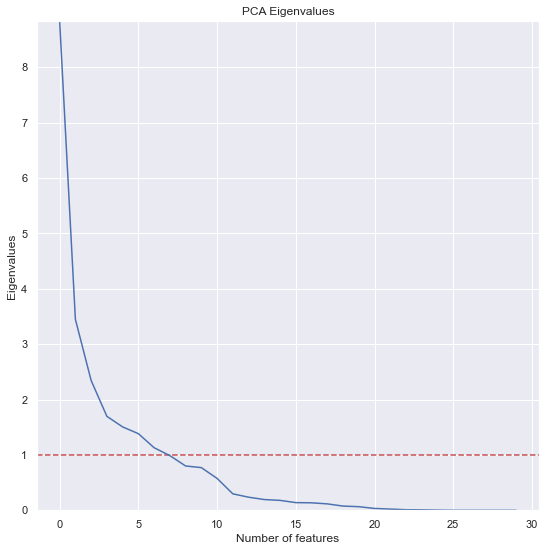

In [67]:
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

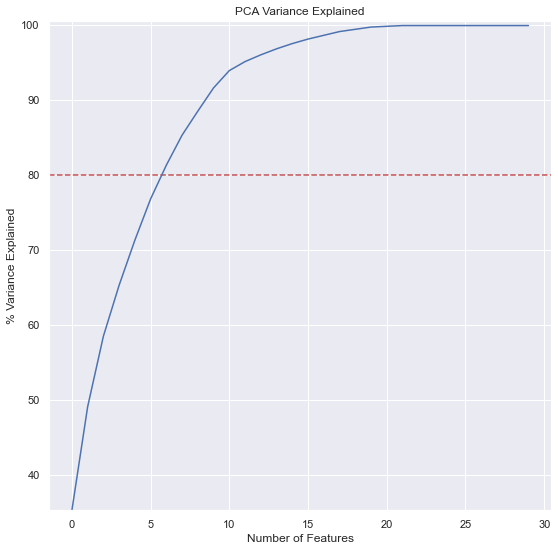

In [68]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [69]:
pca=PCA(n_components=7)
xpca=pca.fit_transform(x)
x=xpca

In [70]:
pd.DataFrame(data=x)

0         1         2         3         4         5         6
0      -1.135155 -0.840711 -0.423443  3.110736 -0.361566  1.369516 -0.082634
1       1.308188  4.526361  3.041229  0.037292 -2.364241  0.573438 -0.596680
2      -2.486246  0.865532  0.880609 -0.376620  0.377879 -0.115146 -0.165562
3      -3.344402 -1.233933  0.402709 -0.521533 -0.817565 -0.605141 -0.776036
4       2.792385 -0.841526 -3.362546 -0.186307 -1.578168 -1.650068  0.442643
...          ...       ...       ...       ...       ...       ...       ...
194341 -0.740130  2.512047 -2.051551  0.031986 -0.649117 -0.792796  0.386356
194342 -1.086778 -0.699555 -1.065504 -1.593352  0.946294  0.832815  0.330356
194343  5.316727 -0.589876  2.133815 -0.468915 -1.835800  1.097398  2.119862
194344  2.647847  1.148151  1.001637 -1.358654 -1.615441  2.792111  0.402038
194345  1.405485  5.209250 -0.679318 -1.223345 -1.877709  2.870327 -1.057627

[194346 rows x 7 columns]

In [71]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9,stratify=y)

## Handling imbalanced data through Smote technique

In [72]:
#!pip install imblearn

In [73]:
from imblearn.combine import SMOTETomek

In [74]:
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 118788, 0: 17254})
The number of classes after fit Counter({1: 116872, 0: 87175})


# 6.Building Machine Learning Model

In [4]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [77]:
KNN=KNeighborsClassifier(n_neighbors=6)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
GNB=GaussianNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [78]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('GaussianNB', GNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.7720568057080132


Cross_Val_Score =  0.8787317697476082


roc_auc_score =  0.7563166248820248


classification_report
               precision    recall  f1-score   support

           0       0.32      0.74      0.45      7395
           1       0.95      0.78      0.86     50909

    accuracy                           0.77     58304
   macro avg       0.64      0.76      0.65     58304
weighted avg       0.87      0.77      0.80     58304



[[ 5437  1958]
 [11332 39577]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** LogisticRegression ********************************************************


LogisticRegression()


Accuracy_score =  0.7713192919868277


Cross_Val_Score =  0.8773784909967782


roc_auc_score =  0.7579748077184639


classification_report
        

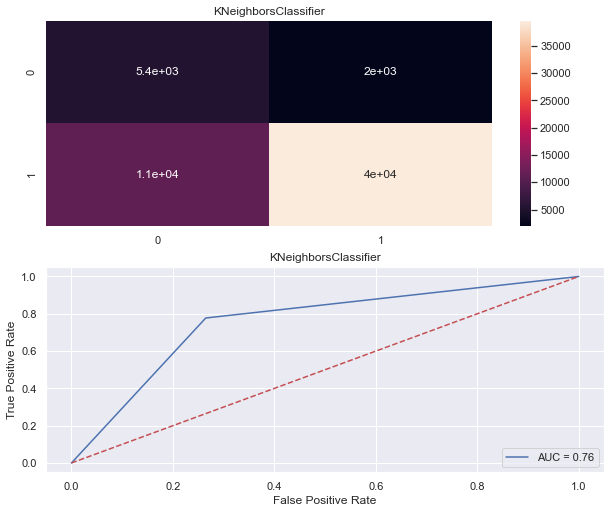

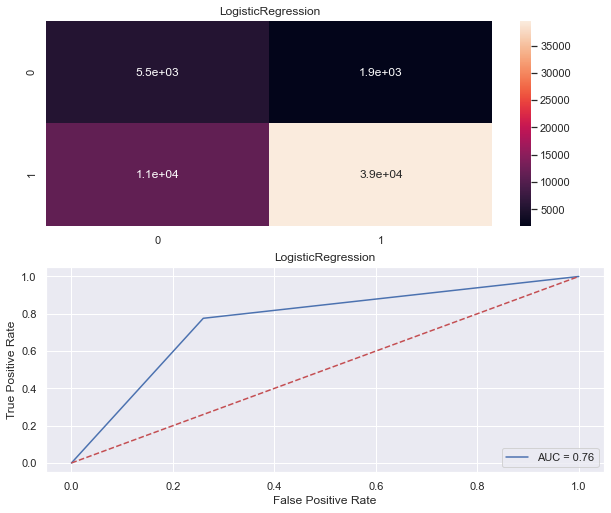

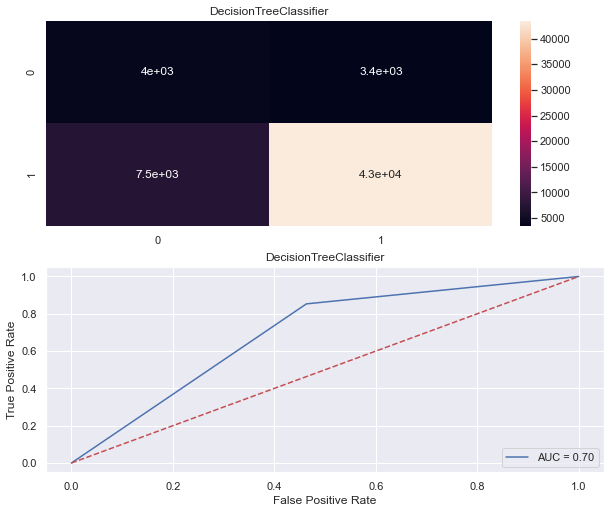

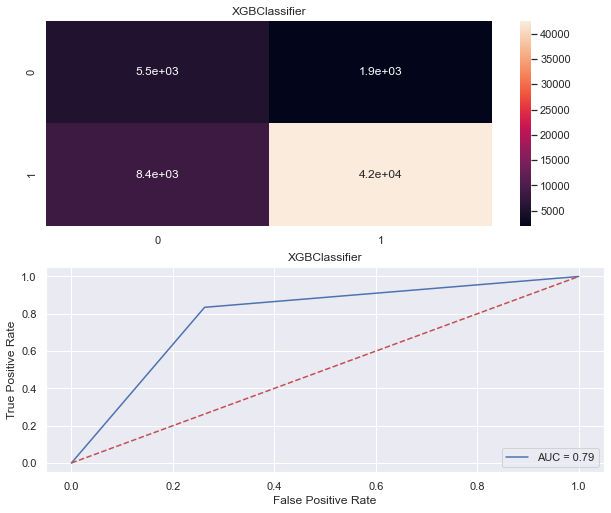

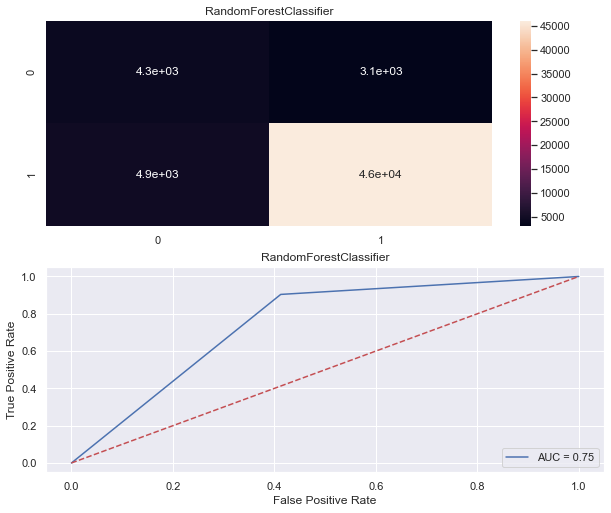

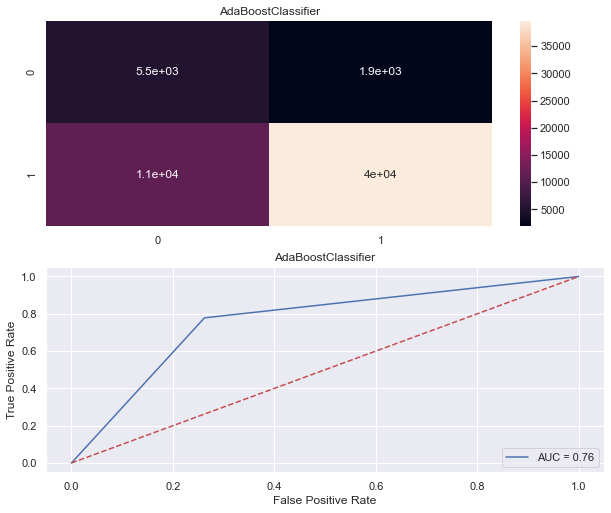

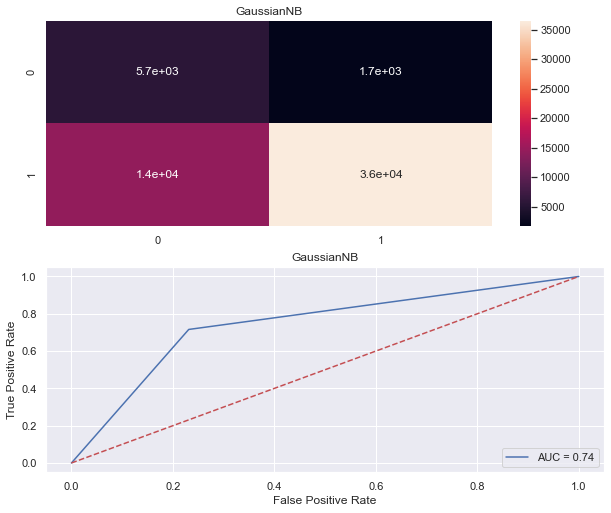

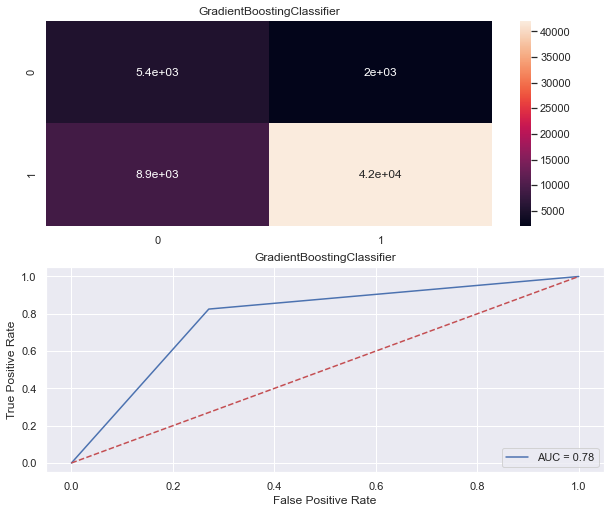

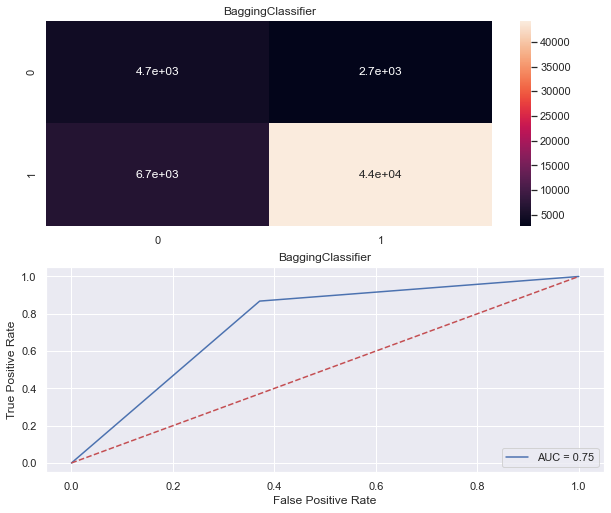

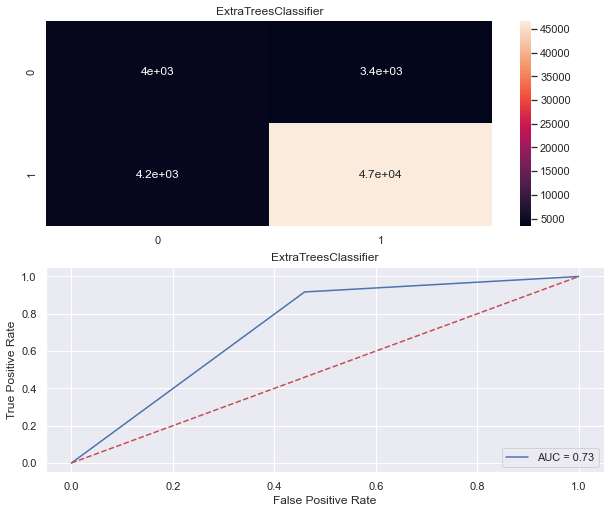

In [79]:
Model= []
score= []
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [80]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0        KNeighborsClassifier       77.205681        87.873177      75.631662
1          LogisticRegression       77.131929        87.737849      75.797481
2      DecisionTreeClassifier       81.304885        84.364999      69.500930
3               XGBClassifier       82.237925        89.008266      78.611521
4      RandomForestClassifier       86.374863        89.042740      74.565563
5          AdaBoostClassifier       77.310305        87.978145      75.801378
6                  GaussianNB       72.272914        80.704007      74.240251
7  GradientBoostingClassifier       81.308315        88.577077      77.726668
8           BaggingClassifier       83.772983        88.182418      74.849858
9        ExtraTreesClassifier       86.927141        88.890949      72.870659

### We choose XGBClassifier as our final model because it is giving best rocscore so a high rocscore will mean high recall which means the classifier does well by not classifying legit transactions as fraudulent.

## Using GridSearchCV to find the best parameters in XGBClassifier

In [81]:
parameters={'n_estimators': [100, 250, 500], 'max_depth': [6,9,12], 'subsample':[0.9, 1.0]}
XGB=XGBClassifier()

clf=GridSearchCV(XGB, parameters, n_jobs=4)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


In [98]:
#XGBClassifier with best parameters

XGB=XGBClassifier(max_depth=6,n_estimators=100,subsample=1.0,gamma=1)
XGB.fit(x_train_ns,y_train_ns)
XGB.score(x_train_ns,y_train_ns)
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.8225850713501647
[[ 5450  1945]
 [ 8399 42510]]
              precision    recall  f1-score   support

           0       0.39      0.74      0.51      7395
           1       0.96      0.84      0.89     50909

    accuracy                           0.82     58304
   macro avg       0.67      0.79      0.70     58304
weighted avg       0.88      0.82      0.84     58304



In [99]:
#cross validate XGBClassifier accuracy

score=cross_val_score(XGB,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.88934911 0.88906326 0.88831717 0.89063264 0.8928452 ]
Mean: 0.8900414759879987
Std: 0.0015886997210552553


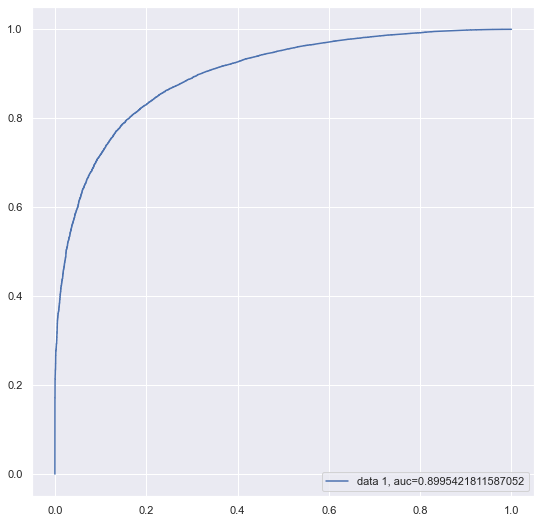

In [100]:
#plotting the roc auc curve

from sklearn import metrics
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

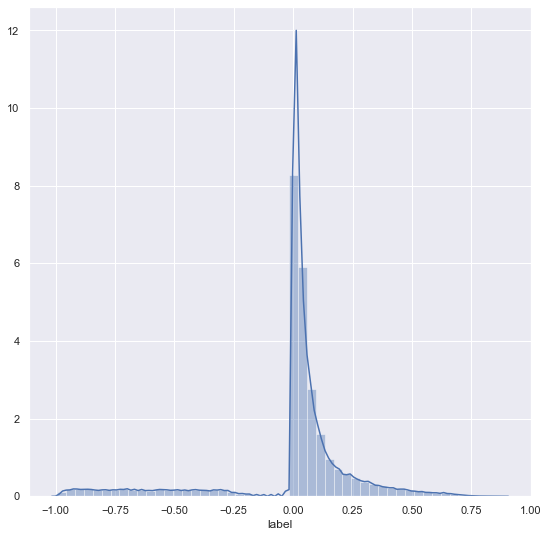

In [101]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred_proba)
plt.show()

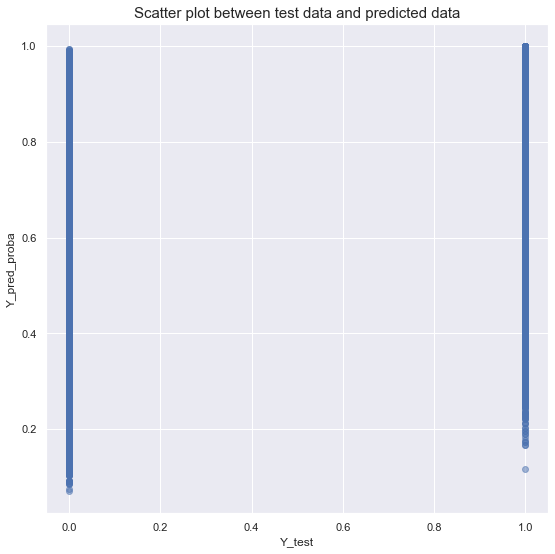

In [102]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred_proba, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred_proba")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [103]:
#saving our model

import joblib
joblib.dump(XGB,'XGB_MicroCreditDefaulter.csv')

['XGB_MicroCreditDefaulter.csv']

In [104]:
model=joblib.load('XGB_MicroCreditDefaulter.csv')

In [105]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 

# 7.Concluding Remarks

**Here,**
We predicted the outcomes in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan using different Classification Models.
The best score of 0.90 was achieved using the best parameters of XGBClassifier through GridSearchCV though both random forest and gradient boosting models performed well too.
